#  <font color='green'> Personalized cancer diagnosis</font>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

 Source:   https://www.kaggle.com/c/msk-redefining-cancer-treatment/ 
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement
 
 1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1> <font color='Purple'>3. Exploratory Data Analysis</font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

our data in CSV files after extracted from zip files

In [3]:
data_var = pd.read_csv('training/training_variants')   #read training varients csv file in dataframe  from trining subfolder
print('Number of data points : ', data_var.shape[0])
print('Number of features : ', data_var.shape[1])
print('Features : ', data_var.columns.values)
data_var.head() #top 5 datapoints

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

**Note:**
   *   seprator is || in this csv  file so  sperate based on '||',
   *   usually in general  CSV file  seperator is ',' comma,

In [4]:
# note the seprator in this file
#seperator is  || in this csv file so sperate based on '||', in reguler csv file seperator is ',' comma,
data_text =pd.read_csv("training/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


## <font color='Blue'> 3.1.3. Text Preprocessing </font>

* text feature(textfeature based on lot of reaserch literature)
* so we have to clean remove all unwanted charecteristics from text feature 
* text feature(textfeature based on lot of reaserch literature)


* so we have to clean remove all unwanted charecteristics from text feature 


*  and remove stopwords from text

In [5]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)   
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [6]:
#text processing stage.
start_time = time.clock()   #represent how much time take for clean preprocess text

for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 209.87843600000002 seconds


we can observe there is no text data at ID = 1109 ,1277,1407 and 1639 

### Merge our dat_text and data_var dataframes base on ID

In [7]:
#merging both gene_variations and text data based on ID
fin_data = pd.merge(data_var,data_text,on='ID', how='left')
print("shape of the data",fin_data.shape)
fin_data.head()

shape of the data (3321, 5)


,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


* features = Text, Variation, Gene and ID 
* class_label = Class

In [8]:
#set all any feature values as NaN
fin_data[fin_data.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [9]:
#seet all Nan values with orinag text values
fin_data.loc[fin_data['TEXT'].isnull(),'TEXT'] = fin_data['Gene'] +' '+fin_data['Variation']

In [10]:
fin_data[fin_data['ID']==1000]

,ID,Gene,Variation,Class,TEXT
1000,1000,TSC1,H105R,4,More than 50% of transitional cell carcinomas ...


In [11]:
#print(top 5 datapoints)
fin_data.head(3)

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [12]:
y = fin_data['Class'].values   #Multiclass label 
fin_data.Gene      = fin_data.Gene.str.replace('\s+', '_')
fin_data.Variation = fin_data.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(fin_data, y, stratify=y, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [13]:
print('Number of data points in train data:', train_df.shape)
print('Number of data points in test data:', test_df.shape)
print('Number of data points in cross validation data:', cv_df.shape)

Number of data points in train data: (2124, 5)
Number of data points in test data: (665, 5)
Number of data points in cross validation data: (532, 5)


### 3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets

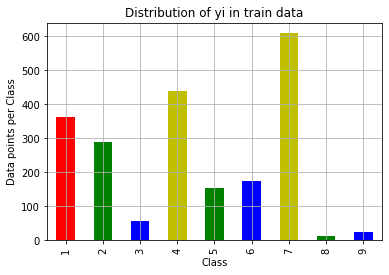

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
****************************************************************************************************


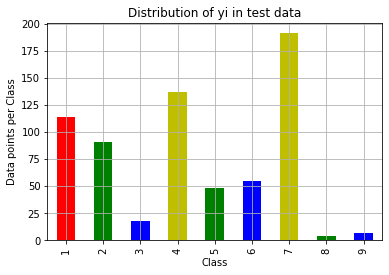

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
****************************************************************************************************


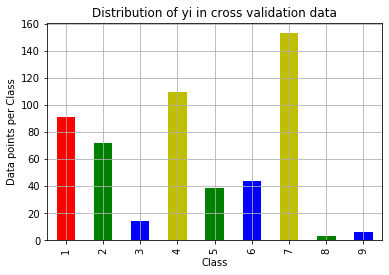

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [14]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()


train_class_distribution.plot(kind='bar', color=['r', 'g', 'b', 'y', 'g', 'b', 'y','g','b'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)  #Returns the indices that would sort an array and '-' indicates high values to low values
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('*'*100)
test_class_distribution.plot(kind='bar',color=['r', 'g', 'b', 'y', 'g', 'b', 'y','g','b'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)   #Returns the indices that would sort an array
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('*'*100)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar',color=['r', 'g', 'b', 'y', 'g', 'b', 'y','g','b'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


**Observation:**
* in above bar plots X-axis represents as Classes and Y-axis represents datapoints in each class
* in train data,cvdata and testdata more datapoints belongs to class7 and class 4
* less data points belongs to class 3,8 and 8
* if we consider number of points percentage  for each class in train,Cv and test data, that percentage roughly same so that **train data and test data from same distribution**

## 3.2 Prediction using a 'Random' Model

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [15]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):   #yi's and yi_hatt
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    #to compute precision
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array#######
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    #to compute Recall
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, fmt=".3f",cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, fmt=".3f",cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, fmt=".3f",cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4547629336574346
Log loss on Test Data using Random Model 2.452666491544615
-------------------- Confusion matrix --------------------


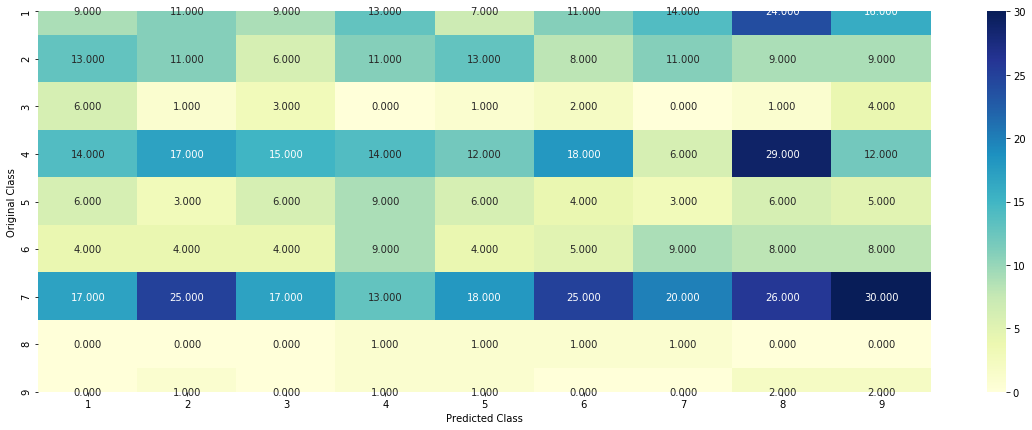

-------------------- Precision matrix (Columm Sum=1) --------------------


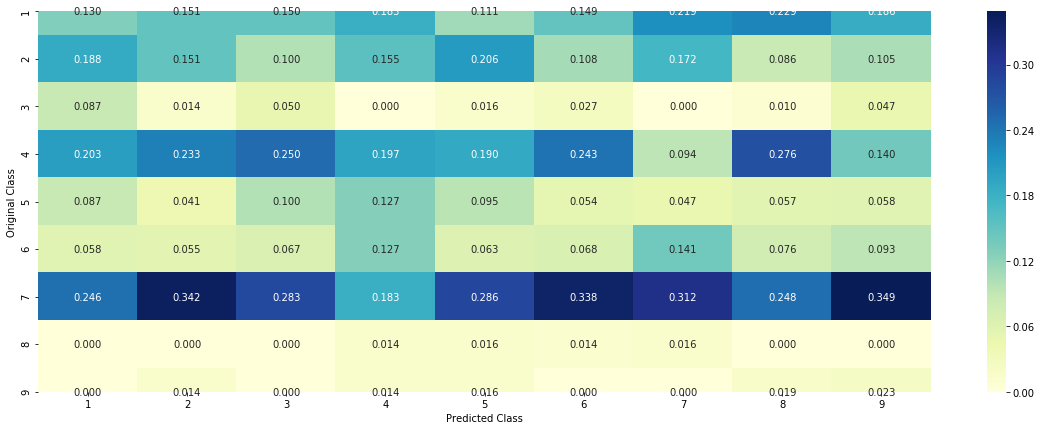

-------------------- Recall matrix (Row sum=1) --------------------


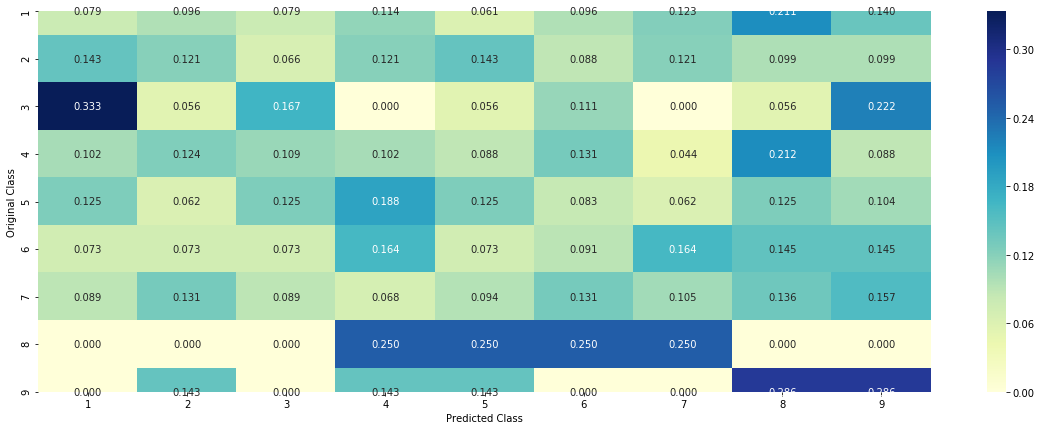

In [16]:
################# we need to generate 9 numbers and the sum of numbers should be 1##########
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]   #length = 665
cv_data_len = cv_df.shape[0]    #length = 532

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))     #creating 2-d array with shape 532 rows,9 clomns
for i in range(cv_data_len):    #532 iterations
    rand_probs = np.random.rand(1,9)   #randomly generate 9 probablities 
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))  #calculating logloss

# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))   #creating 2-d array with shape 665 rows,9 clomns
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))


predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

**observation:**

* Log loss for Random model is = 2.48, so our any base model log loss vale should lie in between 0 to 2.48.

    
* in Confusin matrix we can observe for each class how many number of points correctly predicted and how many they are belongs to  actual class label,  if we look at diagonal values they are correctly predicted(actual class labe = true calss label), remaining all cells values implies wrong classified points

* precision matrix  = from confusion matrix each cell value divide with total number column wise values

   * in precision matrix each percentage value implies how much percentage of actual class values in predicted class    value 

* Recall  matrix  = from confusion matrix each cell value divide with total number row wise values
   
   * in Recall  matrix each percentage value implies how much percentage of predicted class values in Actual class value 



# 3.3 Univariate Analysis

# <font color='Purple'>Responce Coding:</font>
* build a vector (1*9) , 
  the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total   data+90*alpha) 
  * here 90 is due to 10x 9 (9classlabels)

In [17]:
#######################code for response coding with Laplace smoothing###################################
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe


# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

## 3.2.1 Univariate Analysis on Gene Feature

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [18]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 243
BRCA1     172
TP53       99
PTEN       84
EGFR       80
BRCA2      75
KIT        61
BRAF       61
ALK        45
ERBB2      41
PIK3CA     40
Name: Gene, dtype: int64


In [19]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 243 different categories of genes in the train data, and they are distibuted as follows


### Histogram plot

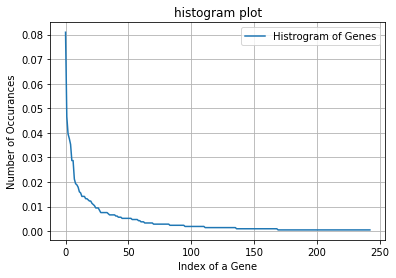

In [20]:
total = sum(unique_genes.values);
histogrm = unique_genes.values/total;   #all unique _categories/totla number of all unique _categories
plt.plot(histogrm, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.title('histogram plot')
plt.grid()
plt.show()


**observation:**
    * we can observe less categories (index range 0 to 10) are occured more time

### Commulative Distribution Plot

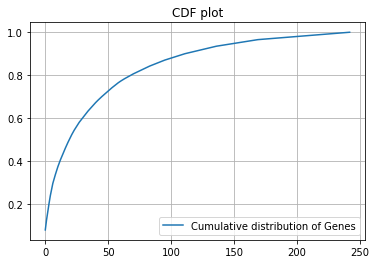

In [21]:
c = np.cumsum(histogrm)   #commulative sum
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.title('CDF plot')
plt.legend()
plt.show()

**observation:**
    * in over all 255 genes top 52 genes have 80% so lot of genes occure very frequently and less genes occure 20%

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

## <font color='Purple'>Responce Coding of Gene feature:</font>

In [22]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))  #function calling   for responce coding of gene feature
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [23]:
print("**after Responce coding**")
print("train data_gene_feature:",train_gene_feature_responseCoding.shape)
print("cv data_gene_feature:\t",test_gene_feature_responseCoding.shape)
print("test data_gene_feature: ",cv_gene_feature_responseCoding.shape)


**after Responce coding**
train data_gene_feature: (2124, 9)
cv data_gene_feature:	 (665, 9)
test data_gene_feature:  (532, 9)


## <font color='Purple'>2. One Hot Encoding of Gene feature</font>

In [24]:
# one-hot encoding of Gene feature
from sklearn.feature_extraction.text import CountVectorizer
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

**get feature name**

In [26]:
l=[]
for i in gene_vectorizer.get_feature_names():
    l.append(i)
l

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1b',
 'arid2',
 'arid5b',
 'asxl2',
 'atm',
 'atr',
 'aurka',
 'aurkb',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxo1',
 'foxp1',
 'gata3',
 'gli1',
 'gna11',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hr

## Q4 How good is this gene feature  in predicting y_i?

* There are many ways to estimate how good a feature is, in predicting y_i. 


* One of the good methods is to build a proper ML model using just this  one feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.2134934006993991
For values of alpha =  0.0001 The log loss is: 1.1874327908944193
For values of alpha =  0.001 The log loss is: 1.2223396451196973
For values of alpha =  0.01 The log loss is: 1.3280435874450205
For values of alpha =  0.1 The log loss is: 1.4450739905136565
For values of alpha =  1 The log loss is: 1.4934585463541048


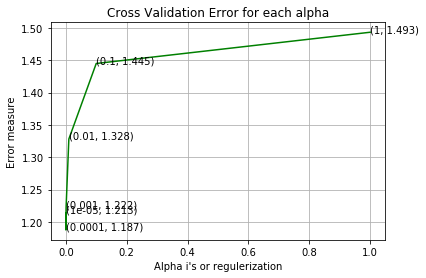

For values of best alpha =  0.0001 The train log loss is: 1.012803880527465
For values of best alpha =  0.0001 The cross validation log loss is: 1.1874327908944193
For values of best alpha =  0.0001 The test log loss is: 1.1978967555532742


In [28]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)  #loss is log loss means logistic regression
    clf.fit(train_gene_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")  #calibrated classifier to find actual probablity on yi's with using sigmoid platten method.
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)  #predict on test data
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)) #fing log loss for every iteration of hyper parameter tunning
    
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

#plot alpha i's values 
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's or regulerization")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**observation:**
    
 * as alpha increses log loss is decreases
 * each alpha is hyper parameter tune regulerization term 
 
**best_alpha = 0.0001**with test logloss = 1.17

* by lokking this logg loss value we can use Gene feature

**Note:**
* here our test log loss value is 1.70 which is less than the random model test log loss so we can use Gene feauture as well as.

**best_alpha = 0.0001**with test logloss = 1.22

<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [23]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  231  genes in train dataset?
Ans
1. In test data 639 out of 665 : 96.09022556390977
2. In cross validation data 520 out of  532 : 97.74436090225564


# 3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [24]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1929
Truncating_Mutations    56
Deletion                45
Amplification           43
Fusions                 21
Overexpression           5
G12V                     3
Q61R                     3
F28L                     2
E17K                     2
Y42C                     2
Name: Variation, dtype: int64


In [25]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1929 different categories of variations in the train data, and they are distibuted as follows


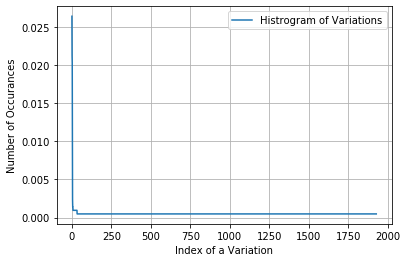

In [26]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

there are few  variation categories are occured more time

[0.02636535 0.04755179 0.06779661 ... 0.99905838 0.99952919 1.        ]


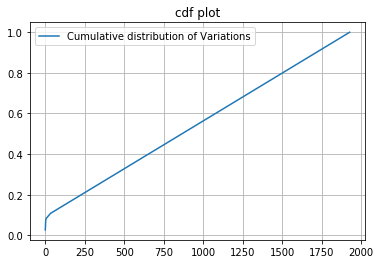

In [27]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.title('cdf plot')
plt.show()

* example:  1500 unique categories  oocured 80% according to the above cdf plot

### Q9.</b> How to featurize this Variation feature ?

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

## <font color='purple'> Responce coding of Variation_feature</font>

#### alpha is used for laplace smoothing we have seen in Naive bayes  laplace /additive smoothing


In [27]:
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [28]:
print("**after Responce coding**")
print("train data_variation_feature:  ",train_variation_feature_responseCoding.shape)
print("cv data_variation_feature:\t",test_variation_feature_responseCoding.shape)
print("test data_variation_feature:   ",cv_variation_feature_responseCoding.shape)


**after Responce coding**
train data_variation_feature:   (2124, 9)
cv data_variation_feature:	 (665, 9)
test data_variation_feature:    (532, 9)


**here 9 dimensions because  9 classes** 

# <font color='purple'> One Hot Encoding of variation feature</font>

In [29]:
# one-hot encoding of variation feature
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [30]:
print("**after Responce coding**")
print("train data_variation_feature:  ",train_variation_feature_onehotCoding.shape)
print("cv data_variation_feature:\t",test_variation_feature_onehotCoding.shape)
print("test data_variation_feature:   ",cv_variation_feature_onehotCoding.shape)


**after Responce coding**
train data_variation_feature:   (2124, 1965)
cv data_variation_feature:	 (665, 1965)
test data_variation_feature:    (532, 1965)


**there are 1964 dimensions**

## Q10. How good is this Variation feature  in predicting y_i?

#### Let's build a model using only one feature 'variation'

For values of alpha =  1e-05 The log loss is: 1.703946693610353
For values of alpha =  0.0001 The log loss is: 1.7008275330401548
For values of alpha =  0.001 The log loss is: 1.700654601336988
For values of alpha =  0.01 The log loss is: 1.7013864584315301
For values of alpha =  0.1 The log loss is: 1.7128967054223758
For values of alpha =  1 The log loss is: 1.7147830176255254


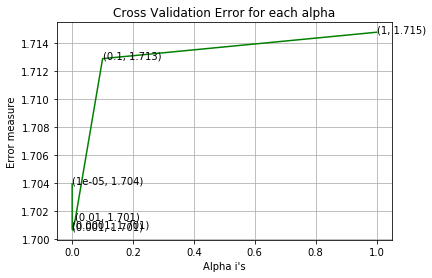

For values of best alpha =  0.001 The train log loss is: 1.0567853319289433
For values of best alpha =  0.001 The cross validation log loss is: 1.700654601336988
For values of best alpha =  0.001 The test log loss is: 1.7178733809050781


In [38]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


* we can observe our best alpha is 0.0001 with log loss is 1.71 on test data

**Note:**
* here our test log loss value is 1.71which is less than the random model test log loss so we can use variation feauture as well as.

<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [39]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1923  genes in test and cross validation data sets?
Ans
1. In test data 59 out of 665 : 8.87218045112782
2. In cross validation data 56 out of  532 : 10.526315789473683


### Note:
**according to the above datapoints in test data 85 out of 665(from train data) so there is large difference  so this is less important feature**

* but according to the logg loss value we could use variation feature as well as.

**according to the above datapoints in test data 74 out of 665(from train data) so there is large difference  so this is less important feature**

# <font color ='blue'> Assignment<font>
    
  * **1. Apply All the models with tf-idf features(Replace CountVectorizer with tfidfVectorizer and run the same cells)**
   
  * 2. Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values**
  * 3. Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
  * 4. Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0

    
    

## <font color ='purple'>1. Perform TFIDF on text data and build all base models<font>

# <font color='green'>3.2.3 Univariate Analysis on Text Feature</font>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

### 1. How many unique words are present in train data?

In [22]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [23]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [28]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 53507


#### Ans: there are 52955unique words in Train data

In [29]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

# <font color='purple'>TFIDF-Vectorizing on Text feature</font>

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
#ngram_range=(1,2) selecting unigrams and bigrams
vectorizer2 = TfidfVectorizer(min_df=10,ngram_range=(1,2))
vectorizer2.fit(train_df['TEXT'].values)
# applying  learned parameters (vocabulary) to the train, cv and cross validation
train_text_feature_tfidf = vectorizer2.transform(train_df['TEXT'].values)
cv_text_feature_tfidf = vectorizer2.transform(cv_df['TEXT'].values)
test_text_feature_tfidf = vectorizer2.transform(test_df['TEXT'].values)

print("*"*60)
print("After vectorizations:")
print(train_text_feature_tfidf.shape, y_train.shape)
print(cv_text_feature_tfidf.shape,y_cv.shape)
print(test_text_feature_tfidf.shape,y_test.shape)

************************************************************
After vectorizations:
(2124, 226515) (2124,)
(532, 226515) (532,)
(665, 226515) (665,)


In [38]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [39]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [40]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 5042, 4: 4005, 6: 2746, 5: 2653, 8: 2288, 7: 2107, 9: 1949, 10: 1317, 12: 1303, 11: 1116, 14: 1050, 16: 1014, 15: 798, 13: 789, 18: 699, 21: 597, 20: 591, 19: 586, 17: 561, 24: 534, 22: 450, 23: 443, 30: 408, 25: 364, 38: 352, 27: 351, 28: 314, 26: 314, 44: 306, 36: 297, 32: 284, 34: 280, 33: 268, 29: 260, 35: 254, 31: 253, 40: 236, 41: 230, 42: 228, 37: 222, 45: 205, 39: 184, 48: 182, 54: 160, 43: 160, 52: 157, 46: 156, 57: 154, 49: 154, 47: 147, 56: 142, 64: 136, 55: 136, 53: 134, 50: 134, 63: 130, 60: 124, 51: 123, 68: 122, 61: 120, 58: 116, 66: 113, 59: 112, 72: 111, 76: 98, 70: 98, 67: 98, 62: 97, 82: 95, 71: 95, 69: 93, 77: 92, 73: 92, 84: 89, 65: 89, 80: 88, 75: 88, 90: 82, 88: 73, 74: 71, 101: 70, 85: 70, 81: 70, 89: 69, 79: 68, 96: 65, 105: 64, 108: 63, 98: 61, 83: 61, 78: 61, 112: 60, 95: 60, 91: 57, 86: 57, 100: 56, 110: 55, 97: 55, 93: 55, 115: 54, 114: 52, 103: 52, 102: 52, 92: 52, 87: 50, 107: 49, 123: 48, 94: 48, 104: 46, 132: 45, 121: 45, 124: 44, 144: 43, 1

## Build a simple Logistic Regeression Model using only one Test feature  train data

For values of alpha =  1e-05 The log loss is: 1.327849332416388
For values of alpha =  0.0001 The log loss is: 1.1745094324771927
For values of alpha =  0.001 The log loss is: 1.1581356306285584
For values of alpha =  0.01 The log loss is: 1.2499345231543746
For values of alpha =  0.1 The log loss is: 1.521183525106121
For values of alpha =  1 The log loss is: 1.7415826414076212


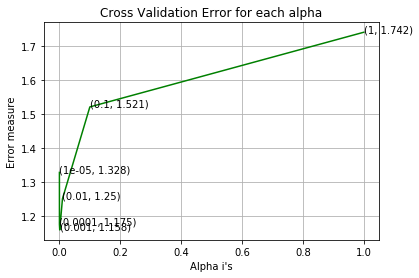

For values of best alpha =  0.001 The train log loss is: 0.6836394279298401
For values of best alpha =  0.001 The cross validation log loss is: 1.1581356306285584
For values of best alpha =  0.001 The test log loss is: 1.1471461500023112


In [41]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

#************model after hyperparameter tunning*******************
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [42]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [43]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

97.248 % of word of test data appeared in train data
98.063 % of word of Cross Validation appeared in train data


#### Finally we can conlude Text FEature is more Useful for classification models

#  <font color = 'blue'>4. Machine Learning Models</font>

### I. Confusion matrix

In [24]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

###  II. logloss value

In [25]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

### III. Get important features

In [26]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

# <font color = 'purple'>Stacking the three features(gene,variation and text) </font>

In [56]:
# merging gene, variance and text features
from scipy.sparse import hstack

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_tfidf = hstack((train_gene_var_responseCoding, train_text_feature_tfidf)).tocsr()
test_x_tfidf = hstack((test_gene_var_responseCoding, test_text_feature_tfidf)).tocsr()
cv_x_tfidf = hstack((cv_gene_var_responseCoding, cv_text_feature_tfidf)).tocsr()


In [57]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 55701)
(number of data points * number of features) in test data =  (665, 55701)
(number of data points * number of features) in cross validation data = (532, 55701)


In [58]:
print(" Tfidf features :")
print("(number of data points * number of features) in train data = ", train_x_tfidf.shape)
print("(number of data points * number of features) in test data = ", test_x_tfidf.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_tfidf.shape)

 Tfidf features :
(number of data points * number of features) in train data =  (2124, 226533)
(number of data points * number of features) in test data =  (665, 226533)
(number of data points * number of features) in cross validation data = (532, 226533)


# <font color='purple'> 4.1. Base Line Model</font>

<h3>4.1.1. Naive Bayes</h3>

# <font color='green'>4.1.1. Naive Bayes</font>

### Text data is TFIDF vectorized Text data

for alpha = 1e-05
Log Loss : 1.22808279887288
for alpha = 0.0001
Log Loss : 1.22642899594583
for alpha = 0.001
Log Loss : 1.2295889735041308
for alpha = 0.1
Log Loss : 1.3514530143189263
for alpha = 1
Log Loss : 1.4239834066926906
for alpha = 10
Log Loss : 1.3906445405334236
for alpha = 100
Log Loss : 1.2962641778321555
for alpha = 1000
Log Loss : 1.263330008161492


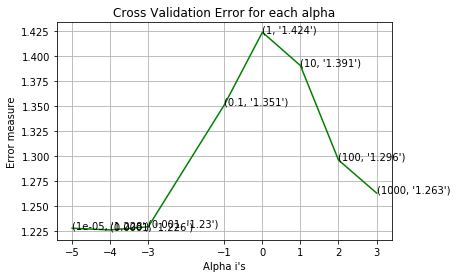

For values of best alpha =  0.0001 The train log loss is: 0.9196428546297337
For values of best alpha =  0.0001 The cross validation log loss is: 1.22642899594583
For values of best alpha =  0.0001 The test log loss is: 1.2262671498977638


In [66]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_tfidf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)


predict_y = sig_clf.predict_proba(train_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### 4.1.1.2. Testing the model with best hyper paramters

Log Loss : 1.22642899594583
Number of missclassified point : 0.3890977443609023
-------------------- Confusion matrix --------------------


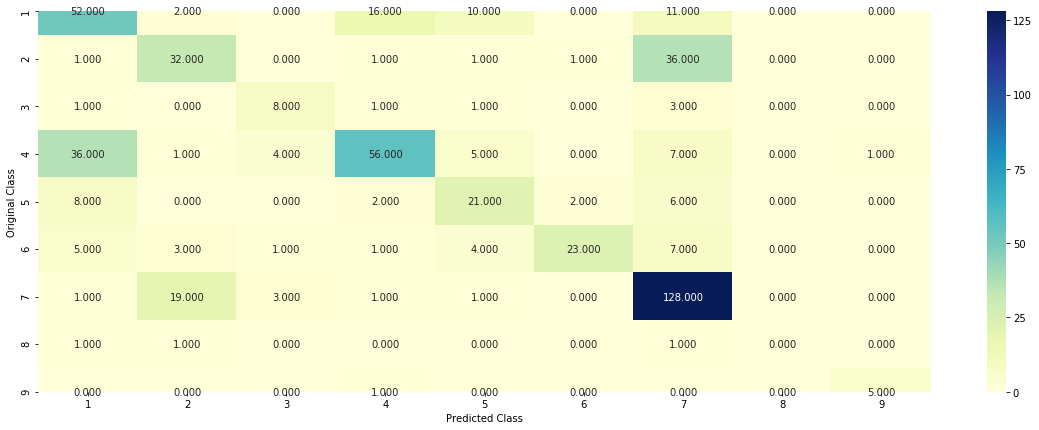

-------------------- Precision matrix (Columm Sum=1) --------------------


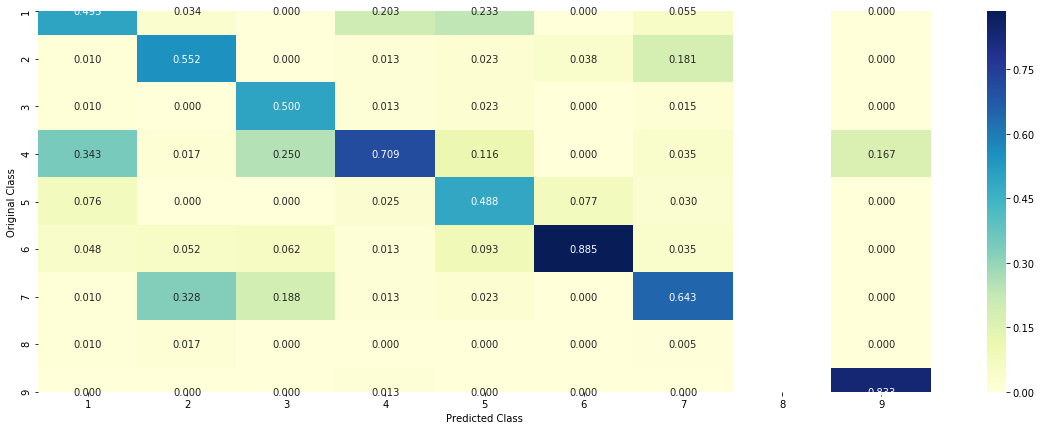

-------------------- Recall matrix (Row sum=1) --------------------


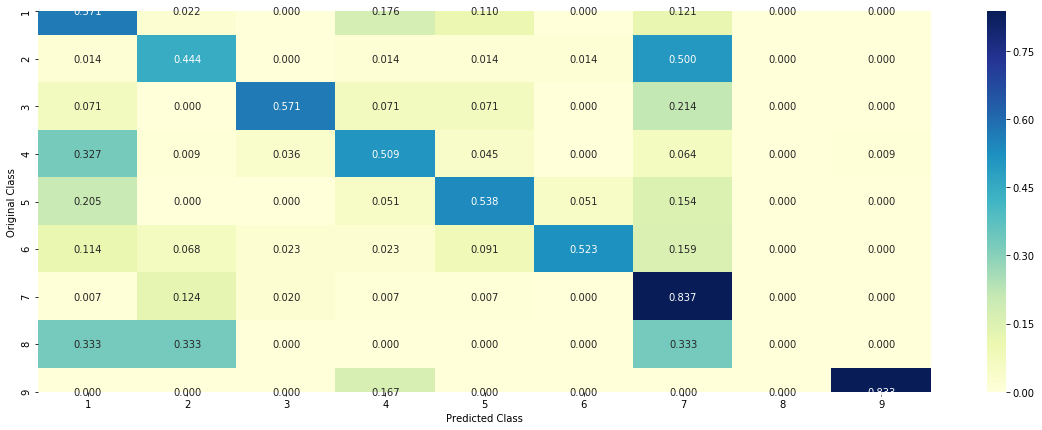

In [67]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_tfidf)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_tfidf.toarray()))

**observation:**
* we can observe  (true positive  and true negetive points) of  confusion matrix, precision matrix and recall matrix


### 4.1.1.4.  Correctly classified point 

In [128]:

test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("*"*60)

Predicted Class : 4
Predicted Class Probabilities: [[0.079  0.0681 0.014  0.6763 0.0418 0.0381 0.0738 0.0054 0.0035]]
Actual Class : 4
************************************************************


### Feature Importance

#### Get Feature importance based on Indices  values on TFIDF encoded text feature

In [129]:
# https://stackoverflow.com/questions/42525072/get-selected-feature-names-tfidf-vectorizer
# https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=3)

tfidf_df = tfidf_vectorizer.fit_transform(test_df['TEXT'])

coef_dict = dict(zip(tfidf_vectorizer.vocabulary_,indices[0]))

#print features based on indices values,  tfidf_vectorizer.vocabulary_ attribute to get a dict which will map the feature names to their indices,

print('top 100 important features')
coef_dict

top 100 important features


{'purpose': 3,
 'clinical': 0,
 'features': 12,
 'epidermal': 9,
 'growth': 14,
 'factor': 16,
 'receptor': 13,
 'egfr': 11,
 'mutations': 10,
 'l858r': 15,
 'deletions': 17,
 'exon': 4,
 '19': 169513,
 't790m': 5,
 'insertions': 2,
 '20': 6,
 'non': 1,
 'small': 8,
 'cell': 7,
 'lung': 140489,
 'cancer': 152304,
 'nsclc': 45805,
 'well': 39801,
 'known': 223133,
 'significance': 80142,
 'uncommon': 80141,
 'association': 24653,
 'effectiveness': 86940,
 'tyrosine': 21099,
 'kinase': 167604,
 'inhibitors': 151969,
 'tki': 45468,
 'understood': 139417,
 'study': 87544,
 'aimed': 41731,
 'improve': 215465,
 'understanding': 37459,
 'unknown': 169643,
 'patients': 217629,
 'methods': 138609,
 'specimens': 195843,
 '261': 44937,
 'tested': 158663,
 'surveyed': 159533,
 'data': 138088,
 'gefitinib': 83536,
 'erlotinib': 227485,
 'results': 227490,
 '627': 71523,
 '49': 158667,
 'included': 215643,
 '258': 134401,
 '260': 224606,
 '25': 215436,
 'duplications': 93121,
 'de': 151919,
 'novo':

### 4.1.1.3.  Inorrectly classified point

In [135]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)

In [136]:
test_point_index = 21
no_feature = 40
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])

indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]

print("*"*50)


Predicted Class : 1
Predicted Class Probabilities: [[0.5969 0.0809 0.0166 0.1108 0.0498 0.0454 0.0891 0.0065 0.0041]]
Actual Class : 6
**************************************************


In [138]:
indices

array([[     9,      0,      3,      4,      5,     12,     10,     14,
            17,     16,     15,     13,     11,      2,      6,      1,
             8,      7, 152304, 140489,  39801, 223133,  45805,  86940,
         80142,  24653,  80141,  45468,  40332,  41731, 167604, 139417,
         87544,  71523,  37459, 217629, 215465,  83536, 138088, 227485]])

### Feature Importance 

In [137]:
# https://stackoverflow.com/questions/42525072/get-selected-feature-names-tfidf-vectorizer
# https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=3)

tfidf_df = tfidf_vectorizer.fit_transform(test_df['TEXT'])

coef_dict = dict(zip(tfidf_vectorizer.vocabulary_,indices[0]))

#print features based on indices values,  tfidf_vectorizer.vocabulary_ attribute to get a dict which will map the feature names to their indices,

print('top 100 important features')
coef_dict

top 100 important features


{'purpose': 9,
 'clinical': 0,
 'features': 3,
 'epidermal': 4,
 'growth': 5,
 'factor': 12,
 'receptor': 10,
 'egfr': 14,
 'mutations': 17,
 'l858r': 16,
 'deletions': 15,
 'exon': 13,
 '19': 11,
 't790m': 2,
 'insertions': 6,
 '20': 1,
 'non': 8,
 'small': 7,
 'cell': 152304,
 'lung': 140489,
 'cancer': 39801,
 'nsclc': 223133,
 'well': 45805,
 'known': 86940,
 'significance': 80142,
 'uncommon': 24653,
 'association': 80141,
 'effectiveness': 45468,
 'tyrosine': 40332,
 'kinase': 41731,
 'inhibitors': 167604,
 'tki': 139417,
 'understood': 87544,
 'study': 71523,
 'aimed': 37459,
 'improve': 217629,
 'understanding': 215465,
 'unknown': 83536,
 'patients': 138088,
 'methods': 227485}

# <font color = 'green'>5.2. K Nearest Neighbour Classification</font>

### 4.2.1. Hyper parameter tuning

for alpha = 5
Log Loss : 1.1590581722179307
for alpha = 11
Log Loss : 1.1830971977440725
for alpha = 15
Log Loss : 1.2106701444886672
for alpha = 21
Log Loss : 1.2130090348130251
for alpha = 31
Log Loss : 1.2258904492463853
for alpha = 41
Log Loss : 1.2313355917886553
for alpha = 51
Log Loss : 1.2367375033212336
for alpha = 99
Log Loss : 1.2440208156540369


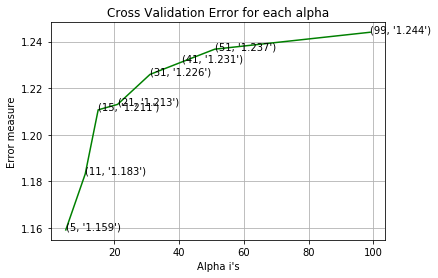

For values of best alpha =  5 The train log loss is: 0.8995584831573694
For values of best alpha =  5 The cross validation log loss is: 1.1590581722179307
For values of best alpha =  5 The test log loss is: 1.1213263356234235


In [140]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_tfidf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


* best alpha value is 5 with low logloss value

<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.1590581722179307
Number of mis-classified points : 0.4116541353383459
-------------------- Confusion matrix --------------------


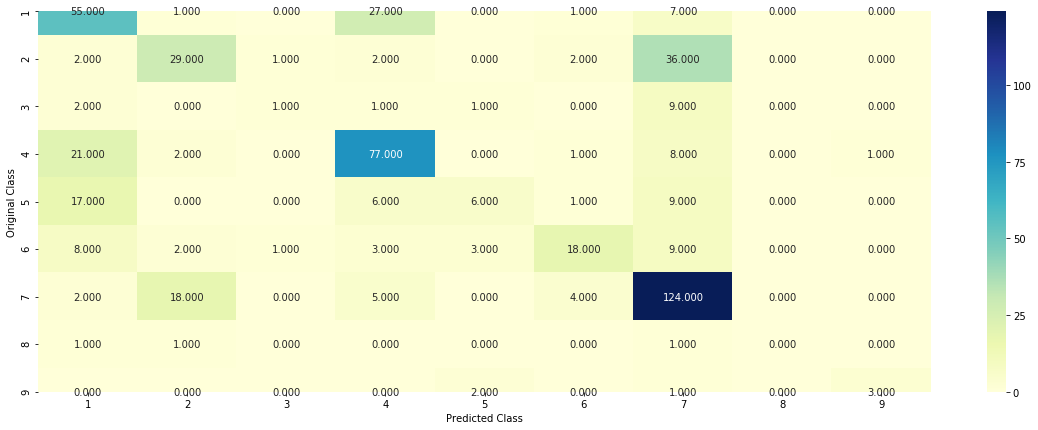

-------------------- Precision matrix (Columm Sum=1) --------------------


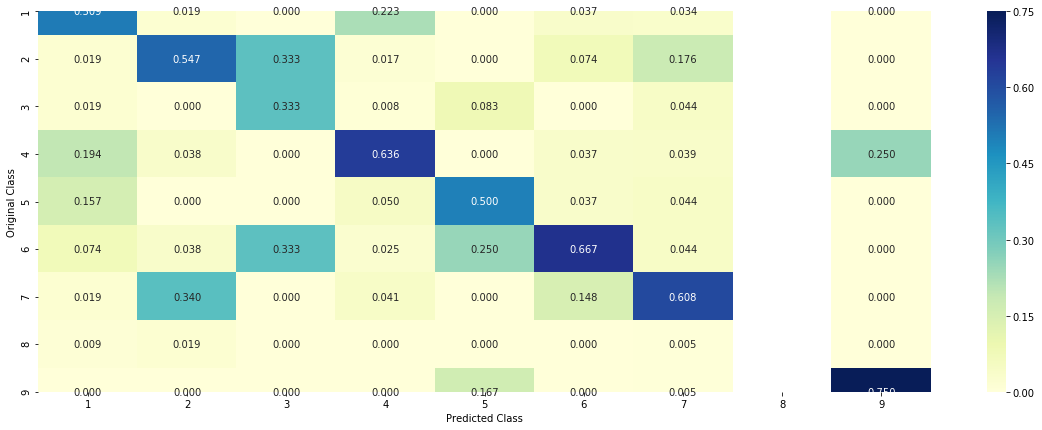

-------------------- Recall matrix (Row sum=1) --------------------


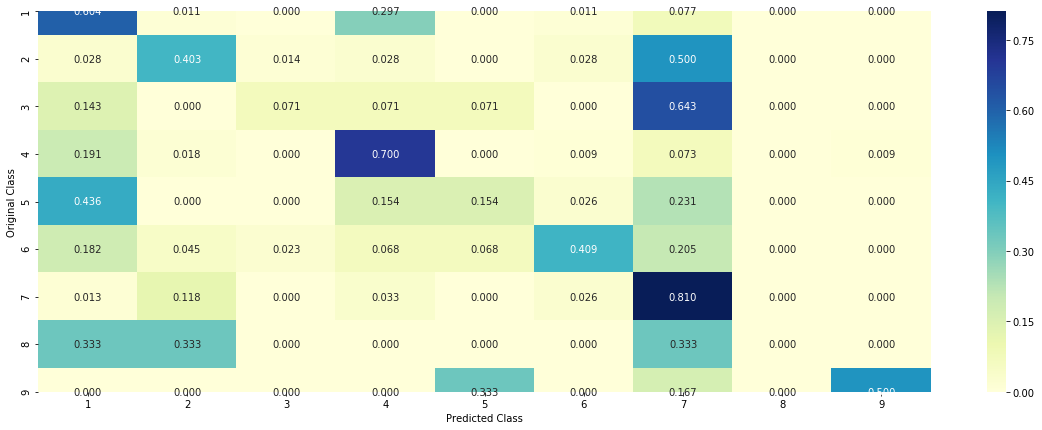

In [143]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_tfidf)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_tfidf.toarray()))
predict_and_plot_confusion_matrix(train_x_tfidf, train_y, cv_x_tfidf, cv_y, clf)

**observation:**
* we can observe  (true positive  and true negetive points) of  confusion matrix, precision matrix and recall matrix


<h3>4.2.3.Sample Query point -1</h3>

In [144]:
test_point_index = 1
predicted_cls = sig_clf.predict(test_x_tfidf[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_tfidf[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 2
The  5  nearest neighbours of the test points belongs to classes [4 4 7 1 7]
Fequency of nearest points : Counter({4: 2, 7: 2, 1: 1})


<h3>4.2.4. Sample Query Point-2 </h3>

In [147]:

test_point_index = 20
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_tfidf[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 4
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [4 4 1 4 4]
Fequency of nearest points : Counter({4: 4, 1: 1})


# 4.3. Logistic Regression

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.0173020285636376
for alpha = 1e-05
Log Loss : 0.9310034111886053
for alpha = 0.0001
Log Loss : 0.9256648732052483
for alpha = 0.001
Log Loss : 0.9965303683395017
for alpha = 0.01
Log Loss : 1.1134327049050639
for alpha = 0.1
Log Loss : 1.3195753021437082
for alpha = 1
Log Loss : 1.4668975516627667
for alpha = 10
Log Loss : 1.492477958758643
for alpha = 100
Log Loss : 1.4953500457444973


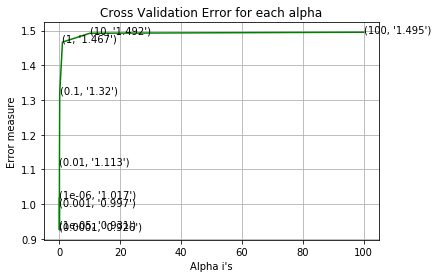

For values of best alpha =  0.0001 The train log loss is: 0.6223745761564317
For values of best alpha =  0.0001 The cross validation log loss is: 0.9256648732052483
For values of best alpha =  0.0001 The test log loss is: 0.9403045430103718


In [148]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)   #l2 regulerization
    clf.fit(train_x_tfidf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

best alpha = 0.0001 with low log loss value

### 4.3.1.2. Testing the model with best hyper paramters

Log loss : 0.9256648732052483
Number of mis-classified points : 0.34022556390977443
-------------------- Confusion matrix --------------------


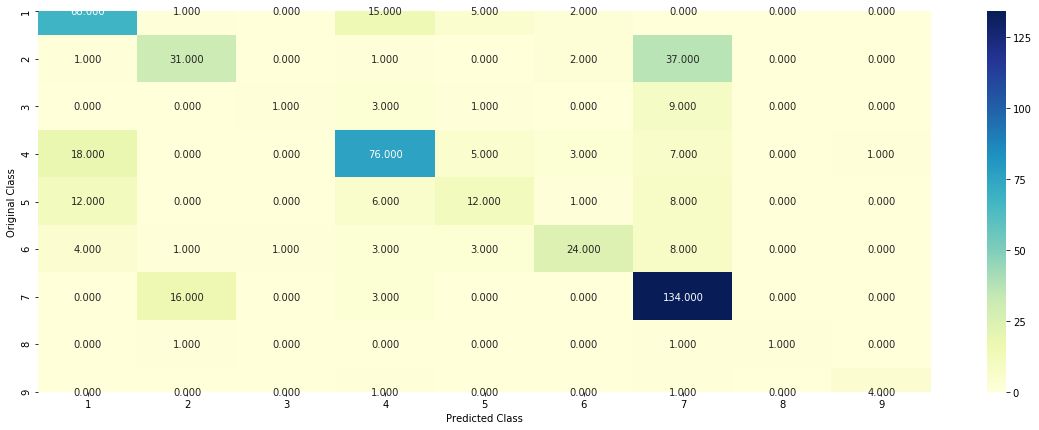

-------------------- Precision matrix (Columm Sum=1) --------------------


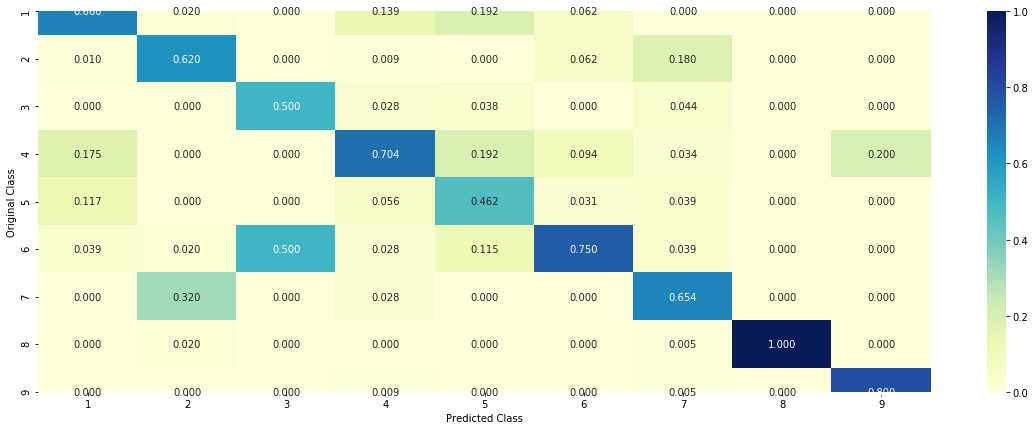

-------------------- Recall matrix (Row sum=1) --------------------


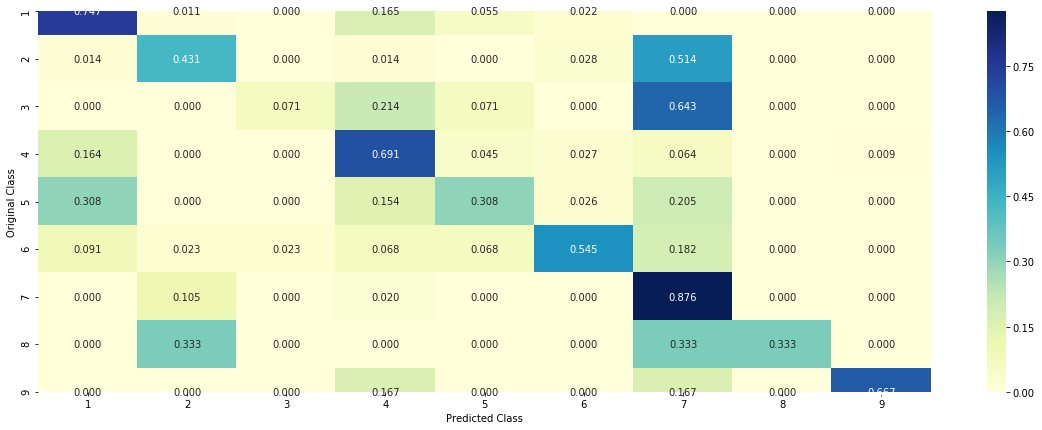

In [149]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_tfidf, train_y, cv_x_tfidf, cv_y, clf)

* misclassifiction percentage = 34%
* we can observe  diagonale values wich are correctly classified points are better than NB and Knn classification

### 4.3.1.3 Correctly Classified point

In [155]:

test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]


Predicted Class : 4
Predicted Class Probabilities: [[0.4283 0.0155 0.0039 0.4947 0.0096 0.0049 0.0382 0.0037 0.0013]]
Actual Class : 4


In [161]:
indices

array([[     3,     12, 209284, 151969,  31818, 169763, 118030, 134620,
        130120, 196151,  84796,  44937,  35907, 152853, 125385, 160917,
        144492,  35591, 162917, 198014,  71418, 184905, 118018, 132181,
         38603, 200071, 106489,  71516,  18741,  34833, 134401,  45296,
         49096,  79780, 229100, 184095,  45225,  35537, 142295, 151919,
        183547,  68273,  86049,  86054,  27929,  98407,  34629,  79311,
        152879, 138609, 209329, 159959, 228936, 173500, 215412,  85789,
         78982, 137247, 187038, 152190, 134383, 187496, 215609, 167604,
         47684,  36618, 100718, 108313,  85927, 161180, 184098, 101387,
         34499, 190430, 152822, 137283, 152227,  79585, 143961, 229231,
         59914,  96945, 100542, 101810,  41429,  71436,  45168, 100583,
        134422,  94657]])

#### Feature Importance

In [157]:
# https://stackoverflow.com/questions/42525072/get-selected-feature-names-tfidf-vectorizer
# https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio

tfidf_vectorizer = TfidfVectorizer(min_df=3)

tfidf_df = tfidf_vectorizer.fit_transform(test_df['TEXT'])

coef_dict = dict(zip(tfidf_vectorizer.vocabulary_,indices[0]))

#print features based on indices values,  tfidf_vectorizer.vocabulary_ attribute to get a dict which will map the feature names to their indices,

print('top  important features')
coef_dict

top  important features


{'purpose': 3,
 'clinical': 12,
 'features': 209284,
 'epidermal': 151969,
 'growth': 31818,
 'factor': 169763,
 'receptor': 118030,
 'egfr': 134620,
 'mutations': 130120,
 'l858r': 196151,
 'deletions': 84796,
 'exon': 44937,
 '19': 35907,
 't790m': 152853,
 'insertions': 125385,
 '20': 160917,
 'non': 144492,
 'small': 35591,
 'cell': 162917,
 'lung': 198014,
 'cancer': 71418,
 'nsclc': 184905,
 'well': 118018,
 'known': 132181,
 'significance': 38603,
 'uncommon': 200071,
 'association': 106489,
 'effectiveness': 71516,
 'tyrosine': 18741,
 'kinase': 34833,
 'inhibitors': 134401,
 'tki': 45296,
 'understood': 49096,
 'study': 79780,
 'aimed': 229100,
 'improve': 184095,
 'understanding': 45225,
 'unknown': 35537,
 'patients': 142295,
 'methods': 151919,
 'specimens': 183547,
 '261': 68273,
 'tested': 86049,
 'surveyed': 86054,
 'data': 27929,
 'gefitinib': 98407,
 'erlotinib': 34629,
 'results': 79311,
 '627': 152879,
 '49': 138609,
 'included': 209329,
 '258': 159959,
 '260': 22893

### 4.3.1.3.2. Incorrectly Classified point

In [164]:
test_point_index = 1
no_feature = 10
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]


Predicted Class : 4
Predicted Class Probabilities: [[0.1284 0.0418 0.0317 0.4246 0.0607 0.0293 0.2682 0.0087 0.0066]]
Actual Class : 2


#### Feature Importance

In [165]:
coef_dict = dict(zip(tfidf_vectorizer.vocabulary_,indices[0]))

#print features based on indices values,  tfidf_vectorizer.vocabulary_ attribute to get a dict which will map the feature names to their indices,

print('top  important features')
coef_dict

top  important features


{'purpose': 3,
 'clinical': 12,
 'features': 209284,
 'epidermal': 151969,
 'growth': 31818,
 'factor': 169763,
 'receptor': 118030,
 'egfr': 134620,
 'mutations': 130120,
 'l858r': 196151}

# <font color = 'purple'>4.4. Linear Support Vector Machines</font>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.0105974733657224
for C = 0.0001
Log Loss : 1.04404976817735
for C = 0.001
Log Loss : 1.1306310583727197
for C = 0.01
Log Loss : 1.1808326229315758
for C = 0.1
Log Loss : 1.395124997815658
for C = 1
Log Loss : 1.4958963815038302
for C = 10
Log Loss : 1.4958963752783938
for C = 100
Log Loss : 1.4958963902378763


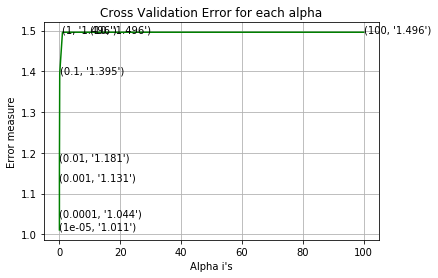

For values of best alpha =  1e-05 The train log loss is: 0.591908054617226
For values of best alpha =  1e-05 The cross validation log loss is: 1.0105974733657224
For values of best alpha =  1e-05 The test log loss is: 1.0219001866449209


In [166]:
#  more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_tfidf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

best alpha = 0.00001 with low logloss value

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.0105974733657224
Number of mis-classified points : 0.33270676691729323
-------------------- Confusion matrix --------------------


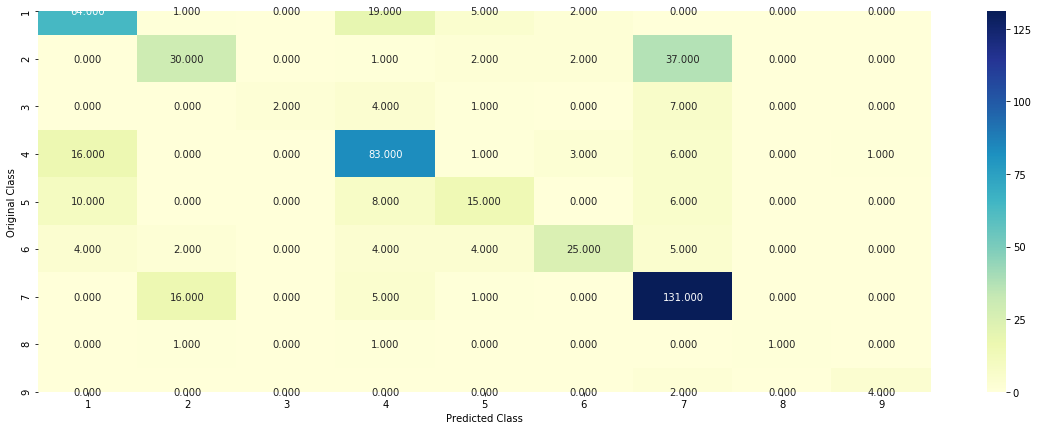

-------------------- Precision matrix (Columm Sum=1) --------------------


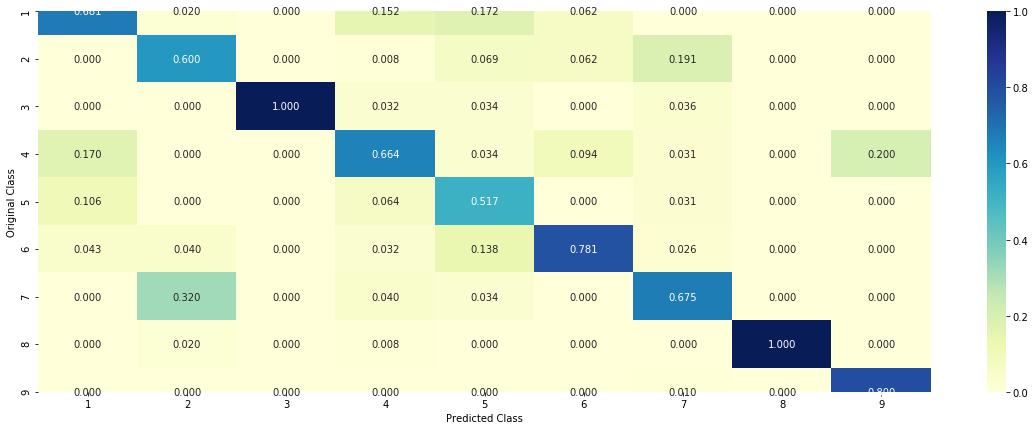

-------------------- Recall matrix (Row sum=1) --------------------


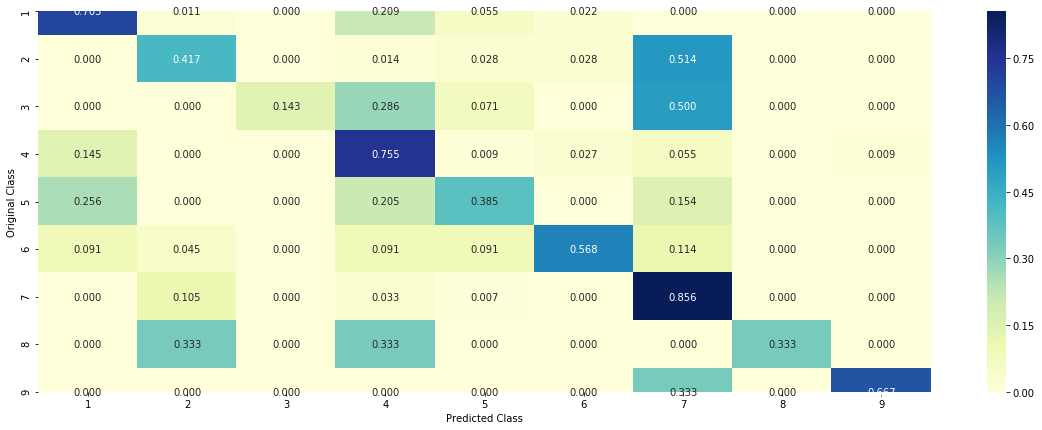

In [167]:
# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_tfidf, train_y,cv_x_tfidf,cv_y, clf)

### 4.3.3. For Correctly classified point

In [170]:
test_point_index = 100
# test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]

Predicted Class : 4
Predicted Class Probabilities: [[0.4574 0.02   0.0024 0.4669 0.0018 0.0013 0.0449 0.0032 0.0019]]
Actual Class : 4


In [171]:
indices

array([[    12,      3,  31818,  71516, 209079,      7,      8,  39801,
        209284, 106489,  74797, 101387,  19297,  71436, 229100, 198014,
         27796, 130120, 134620, 132181, 118030,  60727, 196151,  59867,
        160917, 100609, 187038,  85432,  79585, 100146, 134383, 131539,
        200071,  34629,  78982, 159959, 138609, 205738, 210138, 125385,
         59940, 152853,  79780, 137247,  59914,  85789, 195832,  78225,
        118018, 132931,  87544,  35591,  18741, 205663,  79259, 187496,
        100583,  71437, 152509, 100542, 151969, 152190,  79311,  93819,
         44937, 131420, 195676, 105300, 144492, 224305, 184095, 152561,
        183784,  68273, 100718, 152822, 130165, 167190, 101352, 127222,
         49096,  45296,  36628,  40477, 170947,  84796, 169484, 167604,
         48715, 127233,  35537, 144671,  36624, 102738, 204596,  93813,
        102752, 152879, 196265,  35907]])

#### Feature Importance

In [172]:
tfidf_vectorizer = TfidfVectorizer(min_df=3)

tfidf_df = tfidf_vectorizer.fit_transform(test_df['TEXT'])

coef_dict = dict(zip(tfidf_vectorizer.vocabulary_,indices[0]))

#print features based on indices values,  tfidf_vectorizer.vocabulary_ attribute to get a dict which will map the feature names to their indices,

print('top  important features')
coef_dict

top  important features


{'purpose': 12,
 'clinical': 3,
 'features': 31818,
 'epidermal': 71516,
 'growth': 209079,
 'factor': 7,
 'receptor': 8,
 'egfr': 39801,
 'mutations': 209284,
 'l858r': 106489,
 'deletions': 74797,
 'exon': 101387,
 '19': 19297,
 't790m': 71436,
 'insertions': 229100,
 '20': 198014,
 'non': 27796,
 'small': 130120,
 'cell': 134620,
 'lung': 132181,
 'cancer': 118030,
 'nsclc': 60727,
 'well': 196151,
 'known': 59867,
 'significance': 160917,
 'uncommon': 100609,
 'association': 187038,
 'effectiveness': 85432,
 'tyrosine': 79585,
 'kinase': 100146,
 'inhibitors': 134383,
 'tki': 131539,
 'understood': 200071,
 'study': 34629,
 'aimed': 78982,
 'improve': 159959,
 'understanding': 138609,
 'unknown': 205738,
 'patients': 210138,
 'methods': 125385,
 'specimens': 59940,
 '261': 152853,
 'tested': 79780,
 'surveyed': 137247,
 'data': 59914,
 'gefitinib': 85789,
 'erlotinib': 195832,
 'results': 78225,
 '627': 118018,
 '49': 132931,
 'included': 87544,
 '258': 35591,
 '260': 18741,
 '25':

### 4.3.3.2. For Incorrectly classified point

In [177]:
test_point_index = 1
no_feature = 6
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]


Predicted Class : 4
Predicted Class Probabilities: [[0.0913 0.0592 0.0204 0.532  0.0743 0.012  0.1981 0.0064 0.0064]]
Actual Class : 2


#### Feature importance

In [178]:
coef_dict = dict(zip(tfidf_vectorizer.vocabulary_,indices[0]))

#print features based on indices values,  tfidf_vectorizer.vocabulary_ attribute to get a dict which will map the feature names to their indices,

print('top  important features')
coef_dict

top  important features


{'purpose': 12,
 'clinical': 3,
 'features': 31818,
 'epidermal': 71516,
 'growth': 209079,
 'factor': 7}

# 4.5 Random Forest Classifier

<h3>4.5.1. Hyper paramter tuning (With TFIDF)</h3>

* base models are Decision Trees 
* every DT with high varience with low bias 
* Random forest work if Dimensions low

**Note:**
   * we have Two Hyper parameters:
            1. Number of Base models(Decision trees)
            2. Max depth of each base learner

for n_estimators = 100 and max depth =  5
Log Loss : 1.1814945002646755
for n_estimators = 100 and max depth =  10
Log Loss : 1.0883549138228659
for n_estimators = 200 and max depth =  5
Log Loss : 1.1728930719750315
for n_estimators = 200 and max depth =  10
Log Loss : 1.0795703490639985
for n_estimators = 500 and max depth =  5
Log Loss : 1.1624615672026164
for n_estimators = 500 and max depth =  10
Log Loss : 1.0696905051883956
for n_estimators = 1000 and max depth =  5
Log Loss : 1.15721323855012
for n_estimators = 1000 and max depth =  10
Log Loss : 1.0649314244608326
for n_estimators = 2000 and max depth =  5
Log Loss : 1.15412525891318
for n_estimators = 2000 and max depth =  10
Log Loss : 1.066747410215239


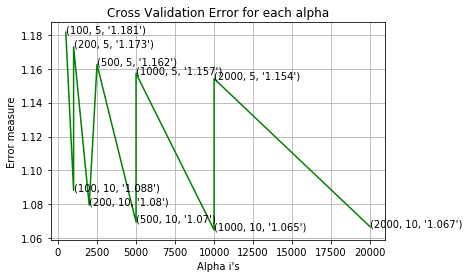

For values of best estimator =  1000 The train log loss is: 0.5017404617781128
For values of best estimator =  1000 The cross validation log loss is: 1.0649314222084825
For values of best estimator =  1000 The test log loss is: 1.0230326480874234


In [61]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]      #number of base models 
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)   #gini impurity
        clf.fit(train_x_tfidf, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_tfidf, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

* best estimator is 1000 and maxdepth = 10 with low logloss value

<h3>4.5.2. Testing model with best hyper parameters (Tfidf)</h3>

Log loss : 1.0649314222084827
Number of mis-classified points : 0.35902255639097747
-------------------- Confusion matrix --------------------


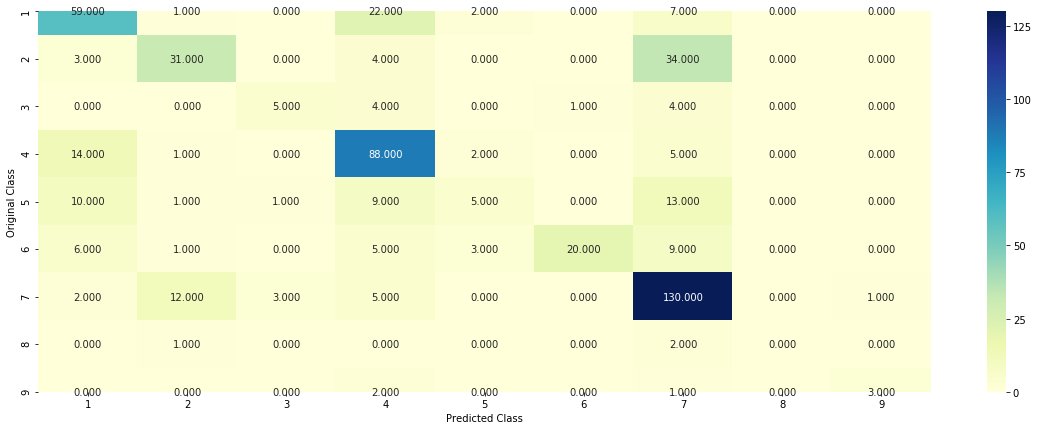

-------------------- Precision matrix (Columm Sum=1) --------------------


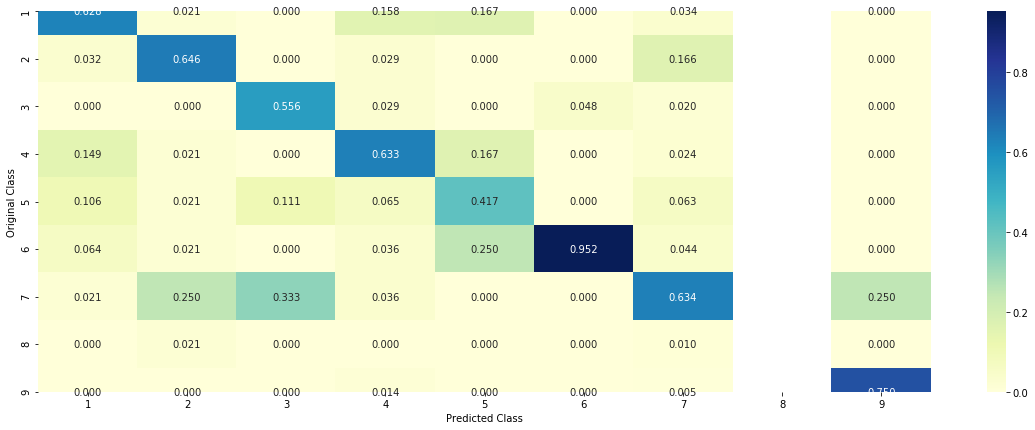

-------------------- Recall matrix (Row sum=1) --------------------


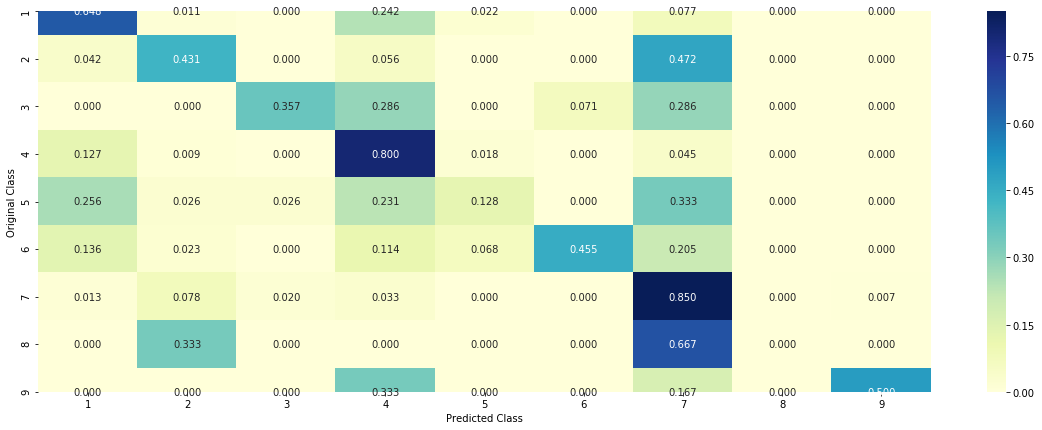

In [62]:
clf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_tfidf, train_y,cv_x_tfidf,cv_y, clf)

### 4.5.3 Correctly Classified point

In [64]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)

Predicted Class : 4
Predicted Class Probabilities: [[0.0212 0.0018 0.0199 0.4478 0.2937 0.2072 0.0035 0.0021 0.0028]]
Actual Class : 4


In [68]:
indices

array([    15,     12,     13, ...,  82595,  82582, 226532])

#### Feature Importance

In [69]:
tfidf_vectorizer = TfidfVectorizer(min_df=3)

tfidf_df = tfidf_vectorizer.fit_transform(test_df['TEXT'])

coef_dict = dict(zip(tfidf_vectorizer.vocabulary_,indices))

#print features based on indices values,  tfidf_vectorizer.vocabulary_ attribute to get a dict which will map the feature names to their indices,

print('top  important features')
coef_dict

top  important features


{'abstract': 15,
 'cancer': 12,
 'specific': 13,
 'mutations': 9,
 'ish2': 11,
 'inter': 10,
 'sh2': 6,
 'nsh2': 3,
 'terminal': 14,
 'domains': 0,
 'p85': 111168,
 'regulatory': 215265,
 'subunit': 116857,
 'phosphatidylinositide': 19988,
 'kinase': 1,
 'pi3k': 20057,
 'show': 16,
 'gain': 20101,
 'function': 202093,
 'induce': 156879,
 'oncogenic': 19804,
 'cellular': 17,
 'transformation': 215254,
 'stimulate': 116955,
 'proliferation': 212970,
 'enhance': 110915,
 'signaling': 171884,
 'quantitative': 5,
 'determinations': 211406,
 'activity': 97672,
 'reveal': 7,
 'large': 116875,
 'differences': 55863,
 'individual': 4,
 'mutants': 124687,
 'mutant': 117029,
 'proteins': 134560,
 'still': 206594,
 'able': 78464,
 'bind': 55860,
 'catalytic': 24095,
 'subunits': 121858,
 'p110': 11912,
 'studies': 165568,
 'isoform': 72687,
 'inhibitors': 211940,
 'suggest': 45243,
 'expression': 177817,
 'fibroblasts': 35066,
 'leads': 143538,
 'exclusively': 72995,
 'activation': 132629,
 'sole'

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [72]:
test_point_index = 60
no_feature = 10
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)


Predicted Class : 6
Predicted Class Probabilities: [[0.0043 0.0153 0.0089 0.0054 0.0255 0.8639 0.0707 0.0027 0.0034]]
Actuall Class : 2


#### Feature Importance

In [73]:

tfidf_df = tfidf_vectorizer.fit_transform(test_df['TEXT'])

coef_dict = dict(zip(tfidf_vectorizer.vocabulary_,indices))

#print features based on indices values,  tfidf_vectorizer.vocabulary_ attribute to get a dict which will map the feature names to their indices,

print('top  important features')
coef_dict

top  important features


{'abstract': 15,
 'cancer': 12,
 'specific': 13,
 'mutations': 9,
 'ish2': 11,
 'inter': 10,
 'sh2': 6,
 'nsh2': 3,
 'terminal': 14,
 'domains': 0,
 'p85': 111168,
 'regulatory': 215265,
 'subunit': 116857,
 'phosphatidylinositide': 19988,
 'kinase': 1,
 'pi3k': 20057,
 'show': 16,
 'gain': 20101,
 'function': 202093,
 'induce': 156879,
 'oncogenic': 19804,
 'cellular': 17,
 'transformation': 215254,
 'stimulate': 116955,
 'proliferation': 212970,
 'enhance': 110915,
 'signaling': 171884,
 'quantitative': 5,
 'determinations': 211406,
 'activity': 97672,
 'reveal': 7,
 'large': 116875,
 'differences': 55863,
 'individual': 4,
 'mutants': 124687,
 'mutant': 117029,
 'proteins': 134560,
 'still': 206594,
 'able': 78464,
 'bind': 55860,
 'catalytic': 24095,
 'subunits': 121858,
 'p110': 11912,
 'studies': 165568,
 'isoform': 72687,
 'inhibitors': 211940,
 'suggest': 45243,
 'expression': 177817,
 'fibroblasts': 35066,
 'leads': 143538,
 'exclusively': 72995,
 'activation': 132629,
 'sole'

# <font color = 'blue'>4.7 Stack the model</font>

### <font color='green'>Important points:</font>
* we lost Model interpratability by using this Stck model
* and also No Feature Importance
* in this Stck models every base model like(svm, logsti reg, NB, Knn) are all share small smount of data for each base classifier
* this is available from mlxtend library

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [75]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

# classifier1 : logistic regression
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_tfidf, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

# classifier2 : svm
clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_tfidf, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

# classifier3: Naive bayes
clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_tfidf, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

#all calibrated classifiers fit on data
sig_clf1.fit(train_x_tfidf, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_tfidf))))
sig_clf2.fit(train_x_tfidf, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_tfidf))))
sig_clf3.fit(train_x_tfidf, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_tfidf))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_tfidf, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_tfidf))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_tfidf))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.11
Support vector machines : Log Loss: 1.50
Naive Bayes : Log Loss: 1.26
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.050
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.579
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.183
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.124
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.128


Best hyper parameter alpha = 0.1 with low log loss value

<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.8792016384405117
Log loss (CV) on the stacking classifier : 1.1827883632154257
Log loss (test) on the stacking classifier : 1.128672318813495
Number of missclassified point : 0.3774436090225564
-------------------- Confusion matrix --------------------


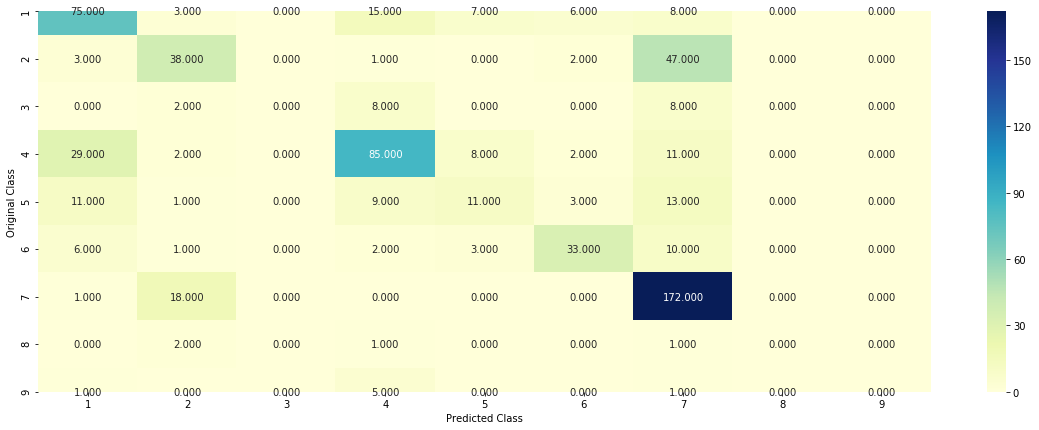

-------------------- Precision matrix (Columm Sum=1) --------------------


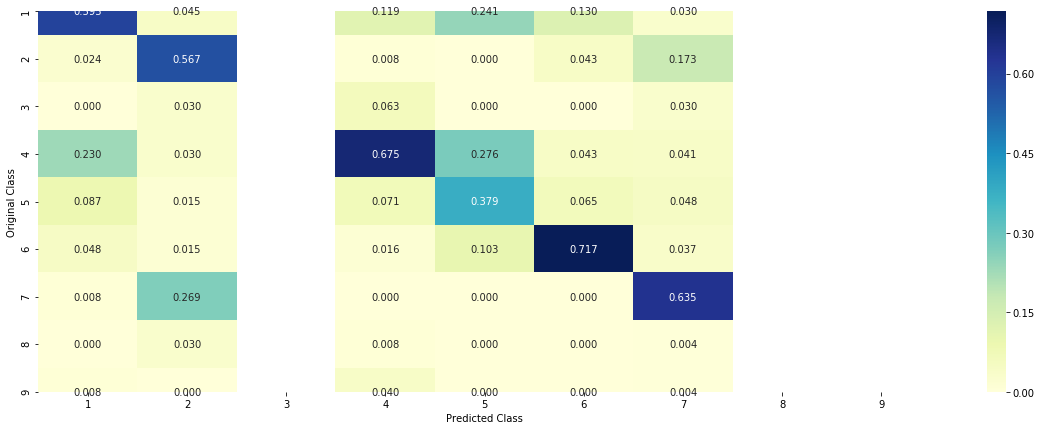

-------------------- Recall matrix (Row sum=1) --------------------


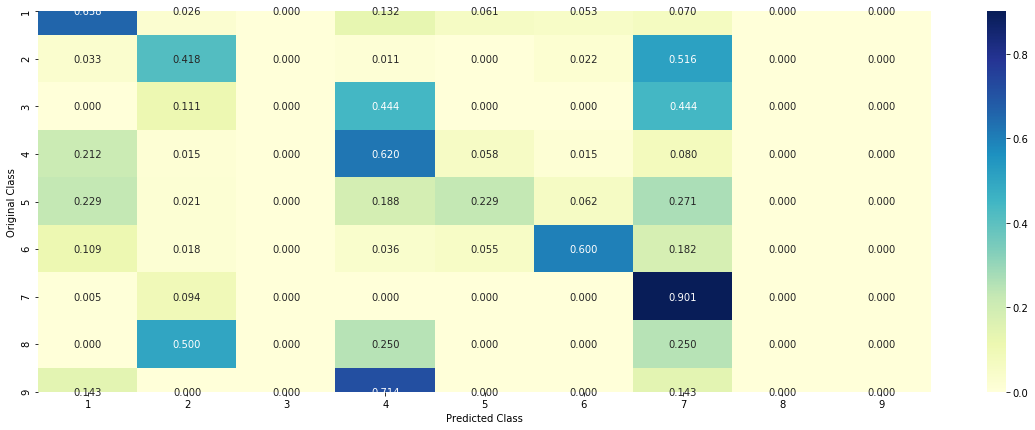

In [76]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_tfidf, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_tfidf))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_tfidf))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_tfidf))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_tfidf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_tfidf))

## 4.7.3 Maximum Voting classifier

### Important points:
* Maximum Voting Classifier chooe the majority voting for probablity score of base models 
* using Probblity value = 'soft'
* we cann'y interpratable for this Maximum Voting Clssifier


Log loss (train) on the VotingClassifier : 0.9625512422569058
Log loss (CV) on the VotingClassifier : 1.216059025685854
Log loss (test) on the VotingClassifier : 1.1669796103279215
Number of missclassified point : 0.3669172932330827
-------------------- Confusion matrix --------------------


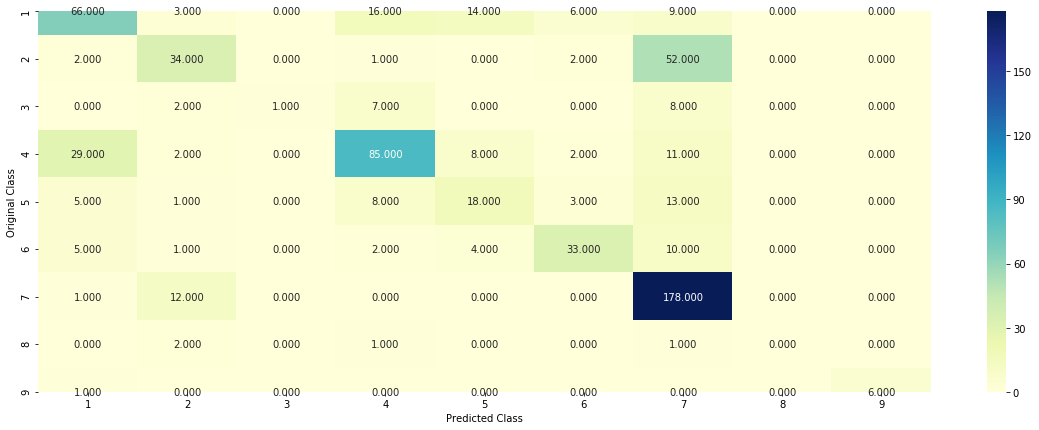

-------------------- Precision matrix (Columm Sum=1) --------------------


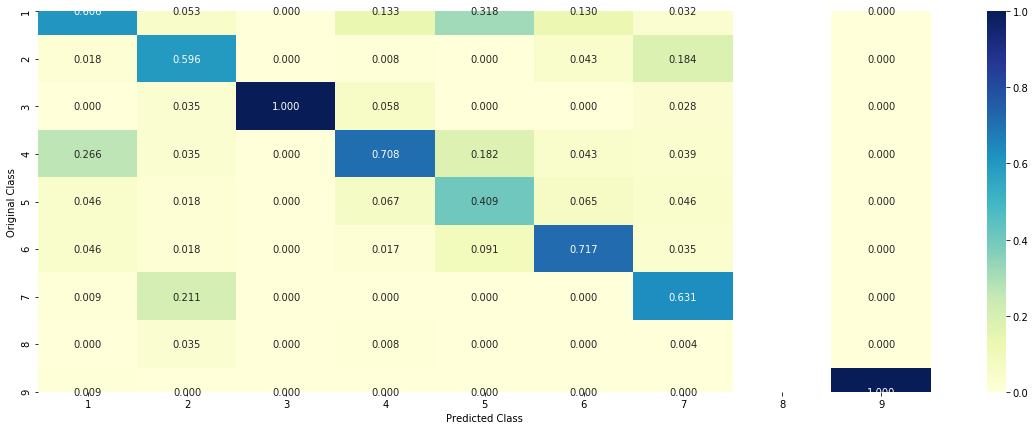

-------------------- Recall matrix (Row sum=1) --------------------


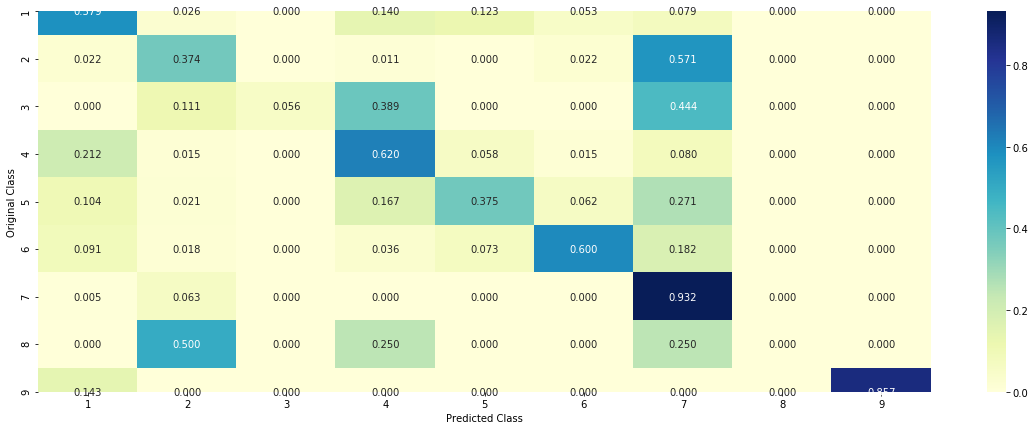

In [77]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_tfidf, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_tfidf)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_tfidf)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_tfidf)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_tfidf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_tfidf))

### 2nd Assignments


   **2. Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values**
  * 3. Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
  * 4. Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0


## <font color='purple'>5.Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</font>

#### 1. we can use sklearn.feature_selection import SelectKBest, chi2
              (or)
#### 2. we can use tfidf(max_features = 1000)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
#ngram_range=(1,2) selecting unigrams and bigrams
vectorizer2 = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=1000) #selecting top 1000 features
vectorizer2.fit(train_df['TEXT'].values)
# applying  learned parameters (vocabulary) to the train, cv and cross validation
train_text_feature_tfidf = vectorizer2.transform(train_df['TEXT'].values)
cv_text_feature_tfidf = vectorizer2.transform(cv_df['TEXT'].values)
test_text_feature_tfidf = vectorizer2.transform(test_df['TEXT'].values)

print("*"*60)
print("After vectorizations:")
print(train_text_feature_tfidf.shape, y_train.shape)
print(cv_text_feature_tfidf.shape,y_cv.shape)
print(test_text_feature_tfidf.shape,y_test.shape)

************************************************************
After vectorizations:
(2124, 1000) (2124,)
(532, 1000) (532,)
(665, 1000) (665,)


### merging responce coded 'gene', responce coded 'VAriation' and tfidf encoded Text feature

In [83]:
train_x_tfidf_topfts = hstack((train_gene_var_responseCoding, train_text_feature_tfidf)).tocsr()
test_x_tfidf_topfts = hstack((test_gene_var_responseCoding, test_text_feature_tfidf)).tocsr()
cv_x_tfidf_topfts = hstack((cv_gene_var_responseCoding, cv_text_feature_tfidf)).tocsr()

print(" Tfidf features :")
print("(number of data points * number of features) in train data = ", train_x_tfidf_topfts.shape)
print("(number of data points * number of features) in test data =  ", test_x_tfidf_topfts.shape)
print("(number of data points * number of features) in cv data =    ", cv_x_tfidf_topfts.shape)

 Tfidf features :
(number of data points * number of features) in train data =  (2124, 1018)
(number of data points * number of features) in test data =   (665, 1018)
(number of data points * number of features) in cv data =     (532, 1018)


# <font color='purple'> 5.1. Base Line Model</font>

# <font color='green'>5.1.1. Naive Bayes</font>

### Text data is TFIDF vectorized Text data with top 1000 features

for alpha = 1e-05
Log Loss : 1.3230935861922157
for alpha = 0.0001
Log Loss : 1.3227647789746841
for alpha = 0.001
Log Loss : 1.3223424887852029
for alpha = 0.1
Log Loss : 1.3226060032440046
for alpha = 1
Log Loss : 1.3423422262244777
for alpha = 10
Log Loss : 1.384495759638885
for alpha = 100
Log Loss : 1.39133593447294
for alpha = 1000
Log Loss : 1.3845373884587302


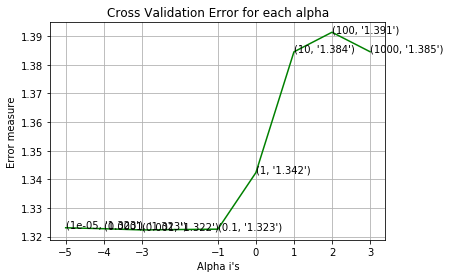

For values of best alpha =  0.001 The train log loss is: 1.1335108786072803
For values of best alpha =  0.001 The cross validation log loss is: 1.3223424887852029
For values of best alpha =  0.001 The test log loss is: 1.2317739878219531


In [84]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_tfidf_topfts, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf_topfts, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf_topfts)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

######################## best alpha #############################
best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidf_topfts, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf_topfts, train_y)


predict_y = sig_clf.predict_proba(train_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


* best alpha is 0.001 with low logloss value

### Testing the model with best hyper paramters

Log Loss : 1.3223424887852029
Number of missclassified point : 0.4755639097744361
-------------------- Confusion matrix --------------------


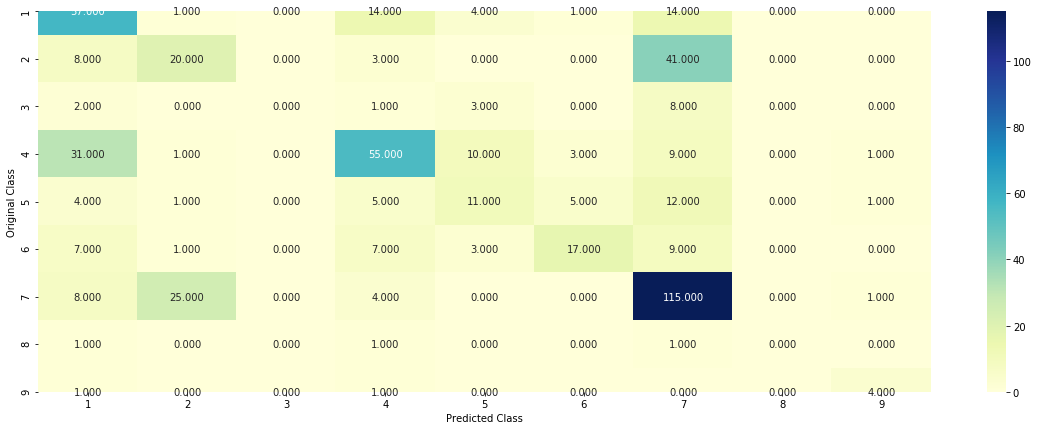

-------------------- Precision matrix (Columm Sum=1) --------------------


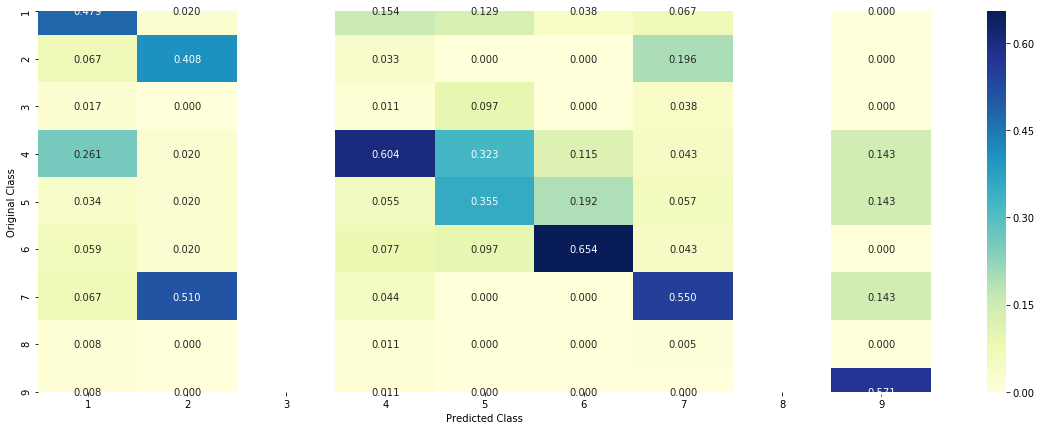

-------------------- Recall matrix (Row sum=1) --------------------


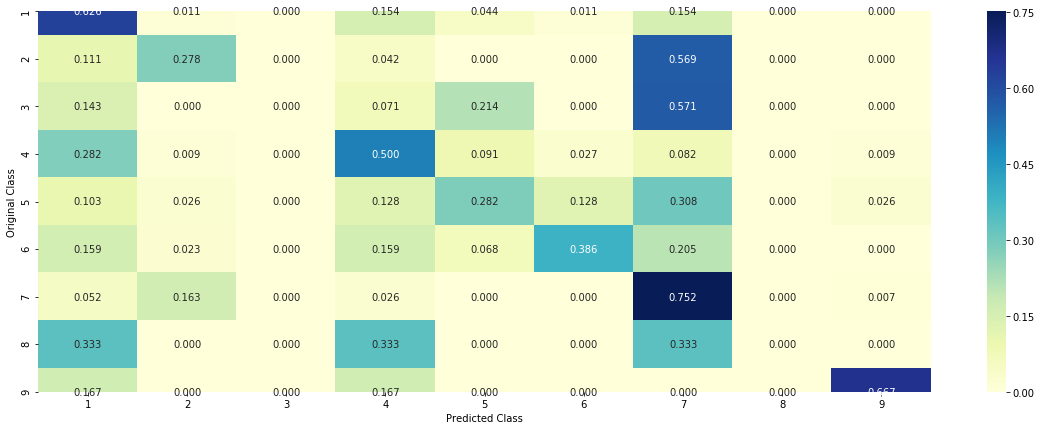

In [85]:


clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidf_topfts, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf_topfts, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf_topfts)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_tfidf_topfts)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_tfidf_topfts.toarray()))

### Correctly classified point 

In [94]:
test_point_index = 4
no_feature = 10
predicted_cls = sig_clf.predict(test_x_tfidf_topfts[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf_topfts[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("*"*60)

Predicted Class : 7
Predicted Class Probabilities: [[0.0532 0.0946 0.0174 0.0622 0.0414 0.0792 0.6419 0.0058 0.0043]]
Actual Class : 7
************************************************************


### Incorrectly classified point 

In [96]:
test_point_index = 10
no_feature = 10
predicted_cls = sig_clf.predict(test_x_tfidf_topfts[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf_topfts[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("*"*60)

Predicted Class : 7
Predicted Class Probabilities: [[0.1018 0.3295 0.0198 0.0814 0.0488 0.0491 0.3575 0.0073 0.0049]]
Actual Class : 2
************************************************************


# <font color = 'green'>5.2. K Nearest Neighbour Classification</font>

### 4.2.1. Hyper parameter tuning

for alpha = 5
Log Loss : 1.1836911780548094
for alpha = 11
Log Loss : 1.2370679054144775
for alpha = 15
Log Loss : 1.2613960182330763
for alpha = 21
Log Loss : 1.2800668028827227
for alpha = 31
Log Loss : 1.3231837513599396
for alpha = 41
Log Loss : 1.3573871142229668
for alpha = 51
Log Loss : 1.3738042693524288
for alpha = 99
Log Loss : 1.3747211908310042


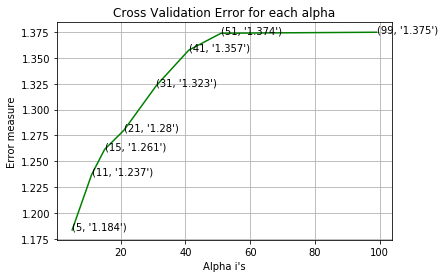

For values of best alpha =  5 The train log loss is: 0.8732422947597105
For values of best alpha =  5 The cross validation log loss is: 1.1836911780548094
For values of best alpha =  5 The test log loss is: 1.1410363934148753


In [97]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]   #K values (nearest neigbours)
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_tfidf_topfts, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf_topfts, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf_topfts)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_tfidf_topfts, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf_topfts, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


### Testing model with best 'K' value

In [98]:
best_k = 5

Log Loss : 1.1836911780548094
Number of missclassified point : 0.41541353383458646
-------------------- Confusion matrix --------------------


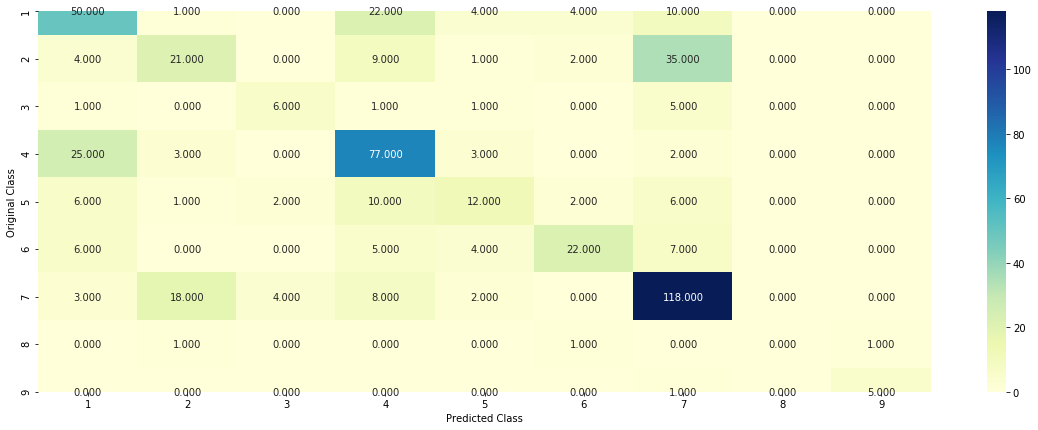

-------------------- Precision matrix (Columm Sum=1) --------------------


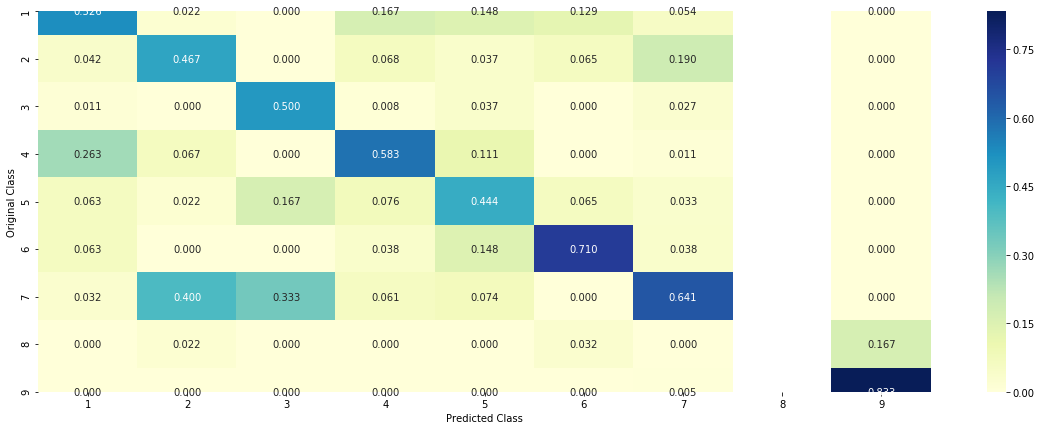

-------------------- Recall matrix (Row sum=1) --------------------


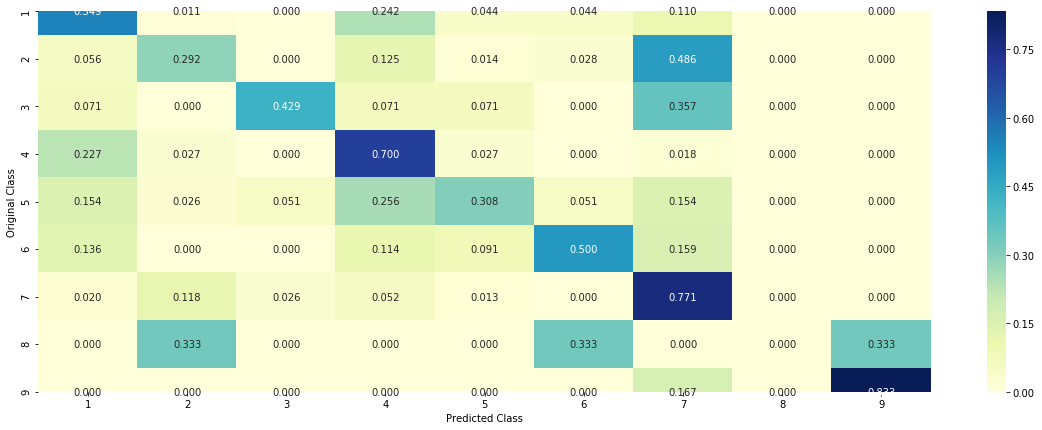

Log loss : 1.1836911780548094
Number of mis-classified points : 0.41541353383458646
-------------------- Confusion matrix --------------------


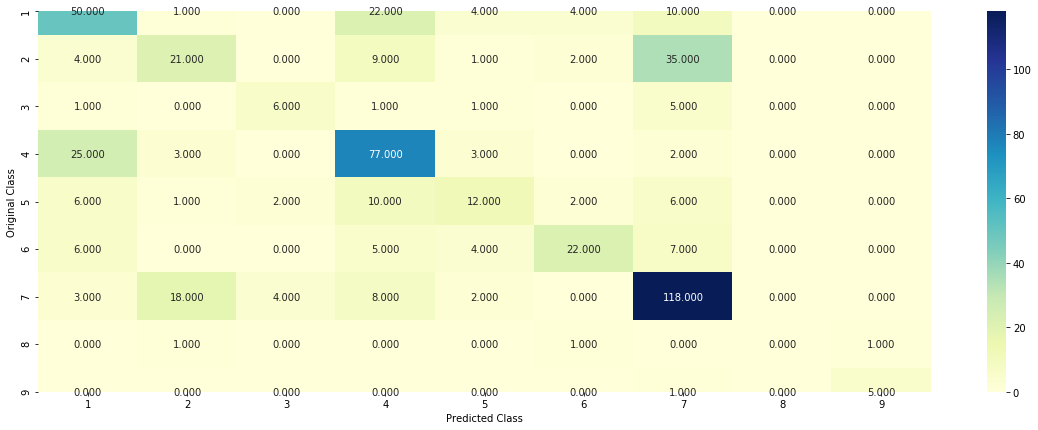

-------------------- Precision matrix (Columm Sum=1) --------------------


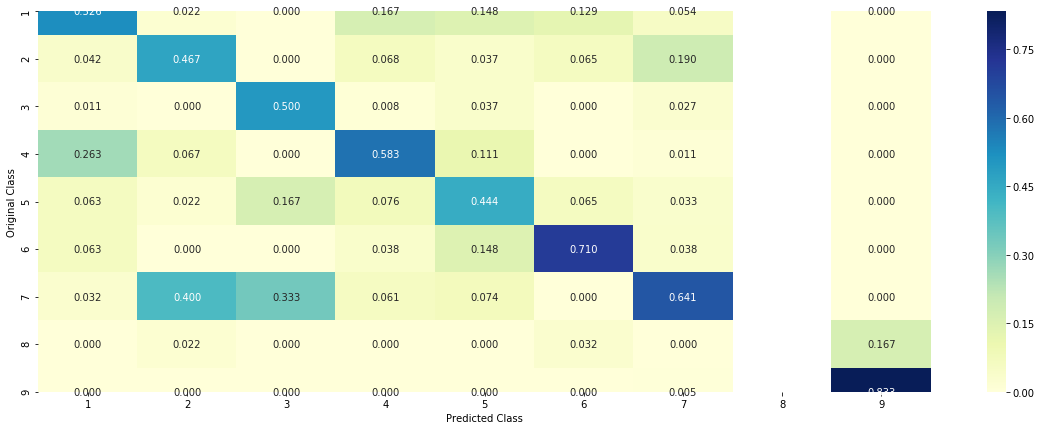

-------------------- Recall matrix (Row sum=1) --------------------


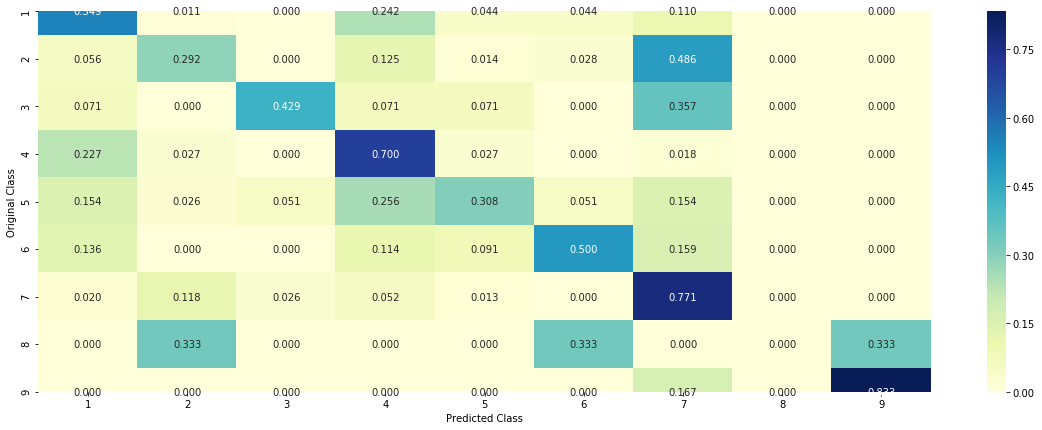

In [101]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_x_tfidf_topfts, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf_topfts, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf_topfts)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_tfidf_topfts)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_tfidf_topfts.toarray()))
predict_and_plot_confusion_matrix(train_x_tfidf_topfts, train_y, cv_x_tfidf_topfts, cv_y, clf)

# 5.3. Logistic Regression

#### Hyper parameter tunning

for alpha = 1e-06
Log Loss : 1.1554588500803162
for alpha = 1e-05
Log Loss : 1.1113277829707755
for alpha = 0.0001
Log Loss : 1.0934491855708612
for alpha = 0.001
Log Loss : 1.176476233546238
for alpha = 0.01
Log Loss : 1.2972484133260758
for alpha = 0.1
Log Loss : 1.542479114737672
for alpha = 1
Log Loss : 1.6715544786231122
for alpha = 10
Log Loss : 1.687889824264559
for alpha = 100
Log Loss : 1.6896611112782878


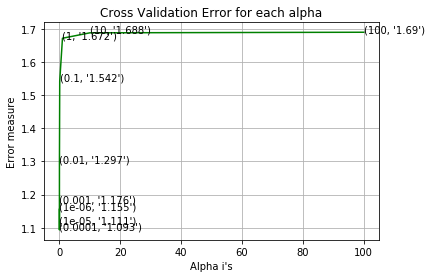

For values of best alpha =  0.0001 The train log loss is: 0.7191003864464933
For values of best alpha =  0.0001 The cross validation log loss is: 1.0934491855708612
For values of best alpha =  0.0001 The test log loss is: 1.0389951132317214


In [104]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)   #l2 regulerization
    clf.fit(train_x_tfidf_topfts, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf_topfts, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf_topfts)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidf_topfts, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf_topfts, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### model with best alpha values

Log loss : 1.0934491855708612
Number of mis-classified points : 0.38533834586466165
-------------------- Confusion matrix --------------------


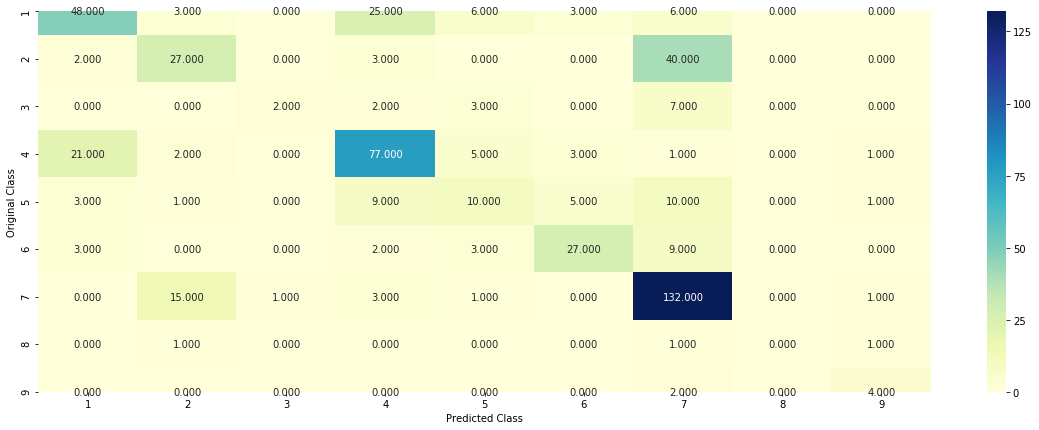

-------------------- Precision matrix (Columm Sum=1) --------------------


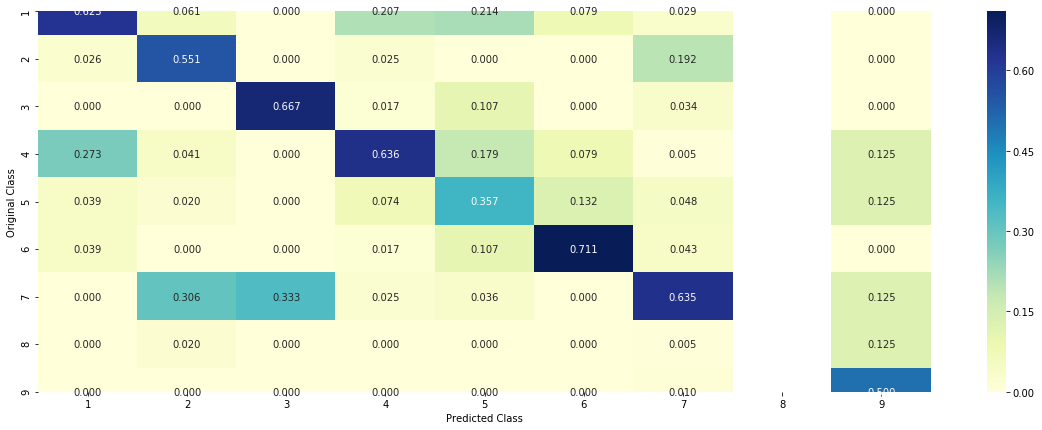

-------------------- Recall matrix (Row sum=1) --------------------


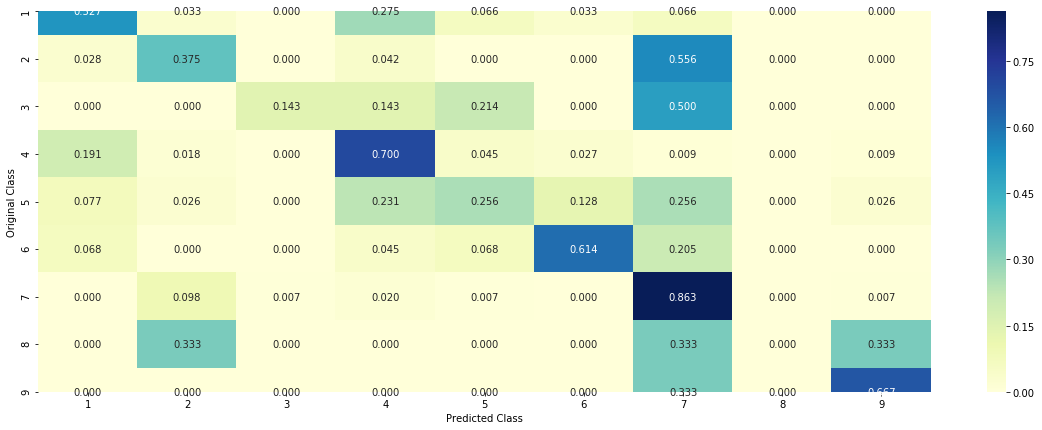

In [105]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_tfidf, train_y, cv_x_tfidf, cv_y, clf)

# <font color = 'purple'>5.4. Linear Support Vector Machines</font>

#### Hyper parameter tunning

for C = 1e-05
Log Loss : 1.1549578693349294
for C = 0.0001
Log Loss : 1.1576182374246342
for C = 0.001
Log Loss : 1.2554578275590937
for C = 0.01
Log Loss : 1.348884946472984
for C = 0.1
Log Loss : 1.5397881446216948
for C = 1
Log Loss : 1.690007819470305
for C = 10
Log Loss : 1.690007824835224
for C = 100
Log Loss : 1.6900078243715397


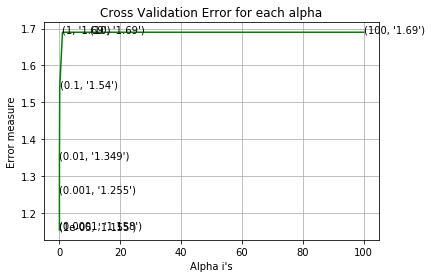

For values of best alpha =  1e-05 The train log loss is: 0.6010398221398138
For values of best alpha =  1e-05 The cross validation log loss is: 1.1549578693349294
For values of best alpha =  1e-05 The test log loss is: 1.0599189925153178


In [106]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_tfidf_topfts, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf_topfts, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf_topfts)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidf_topfts, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf_topfts, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf_topfts)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Model with best alpha value

Log loss : 1.1549578693349294
Number of mis-classified points : 0.37406015037593987
-------------------- Confusion matrix --------------------


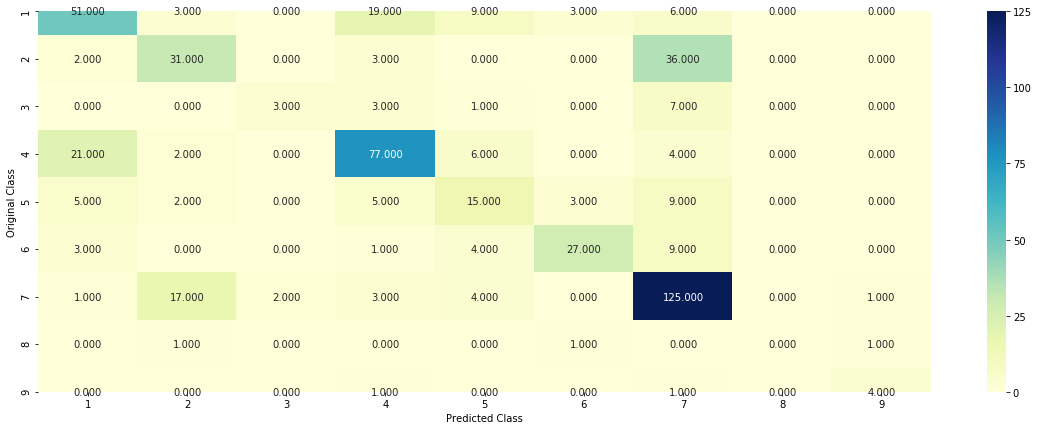

-------------------- Precision matrix (Columm Sum=1) --------------------


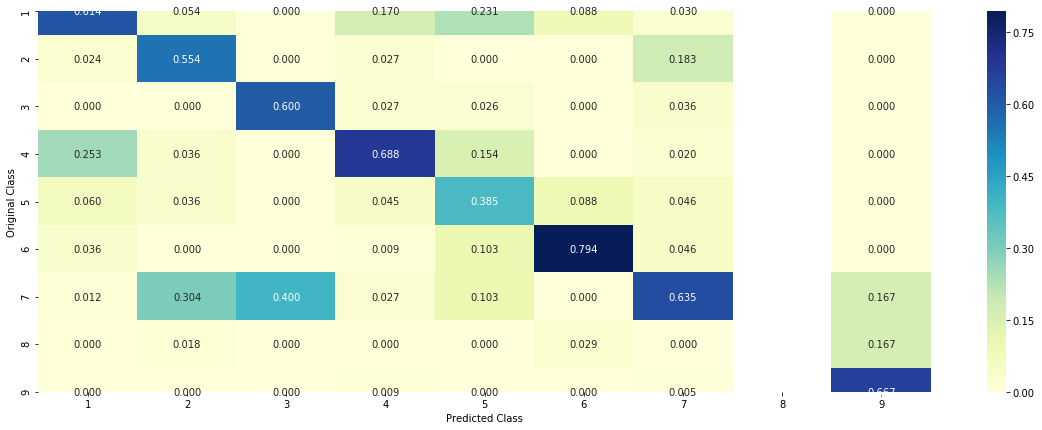

-------------------- Recall matrix (Row sum=1) --------------------


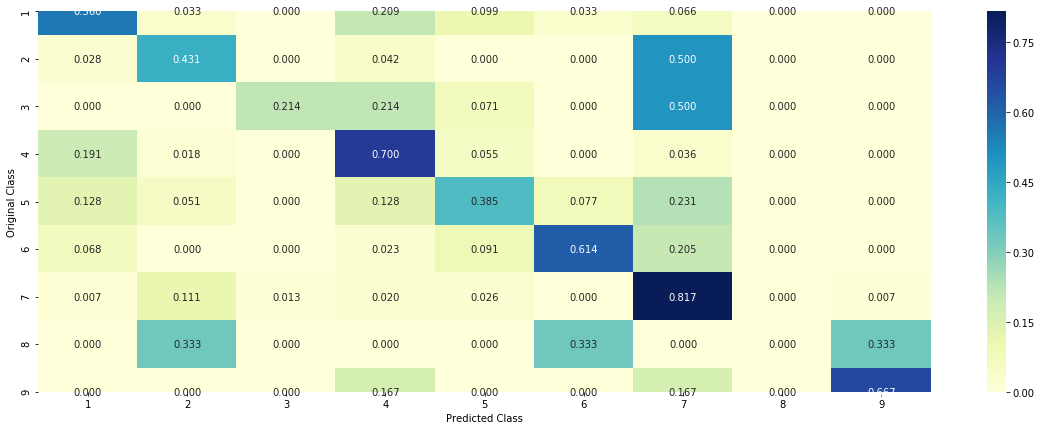

In [107]:
# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_tfidf, train_y,cv_x_tfidf,cv_y, clf)

# <font color = 'purple'>5.5 Random Forest Classifier</font>

<h3>5.5.1. Hyper paramter tuning (With TFIDF)</h3>
* base models are Decision Trees 
* every DT with high varience with low bias 
* Random forest work if Dimensions low

**Note:**
    * we have Two Hyper parameters:
            1. Number of Base models(Decision trees)
            2. Max depth of each base learner

for n_estimators = 100 and max depth =  5
Log Loss : 1.1831543029726386
for n_estimators = 100 and max depth =  10
Log Loss : 1.0720899515050664
for n_estimators = 200 and max depth =  5
Log Loss : 1.1755551044437338
for n_estimators = 200 and max depth =  10
Log Loss : 1.0706921397544502
for n_estimators = 500 and max depth =  5
Log Loss : 1.19050464947799
for n_estimators = 500 and max depth =  10
Log Loss : 1.084686104176858
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2023100694375495
for n_estimators = 1000 and max depth =  10
Log Loss : 1.0829080078370035
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2099574849154964
for n_estimators = 2000 and max depth =  10
Log Loss : 1.0836512661113564


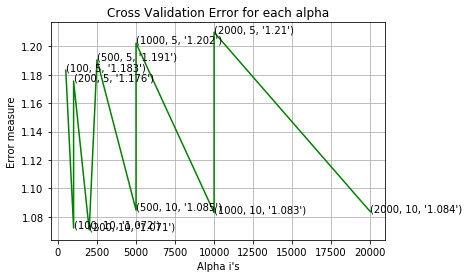

In [108]:
alpha = [100,200,500,1000,2000]      #number of base models 
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)   #gini impurity
        clf.fit(train_x_tfidf_topfts, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_tfidf_topfts, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf_topfts)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

* best max_depth = 10

    (and) 
    
    
* best n_estimators = 200 with low logloss value

### Testing model with best hyper parameter

Log loss : 1.0706921397544502
Number of mis-classified points : 0.34774436090225563
-------------------- Confusion matrix --------------------


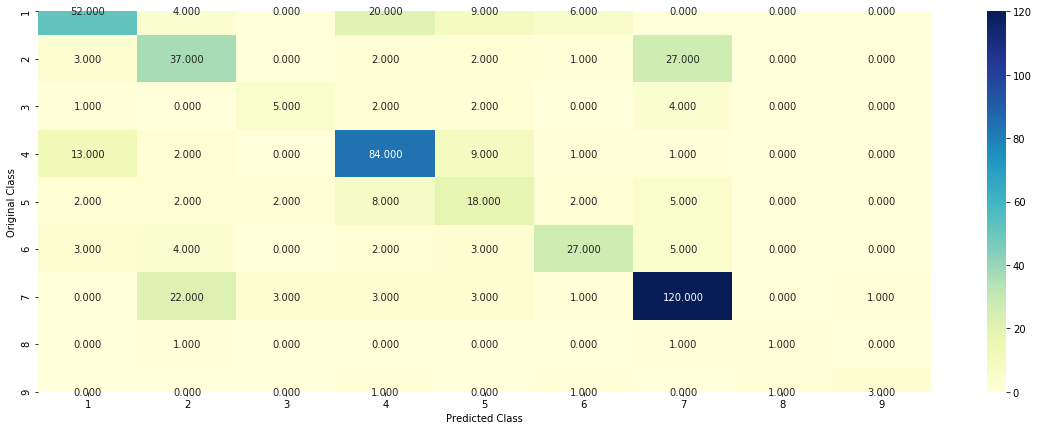

-------------------- Precision matrix (Columm Sum=1) --------------------


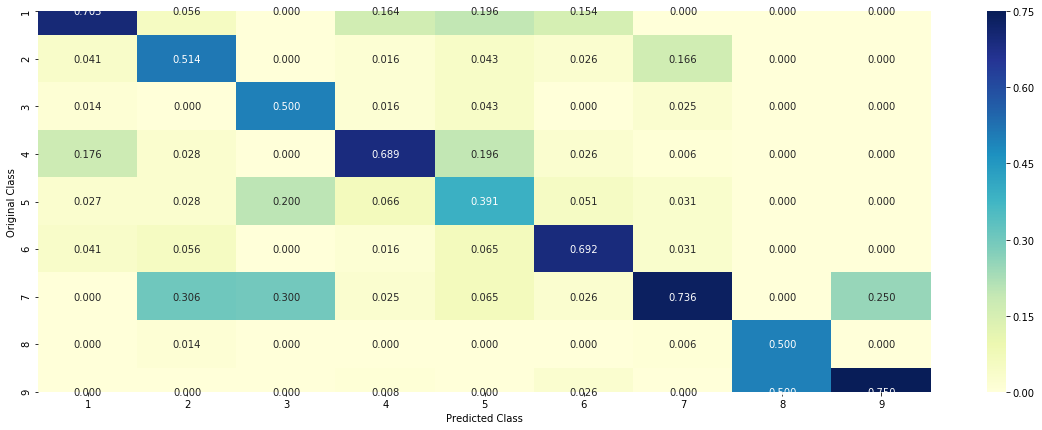

-------------------- Recall matrix (Row sum=1) --------------------


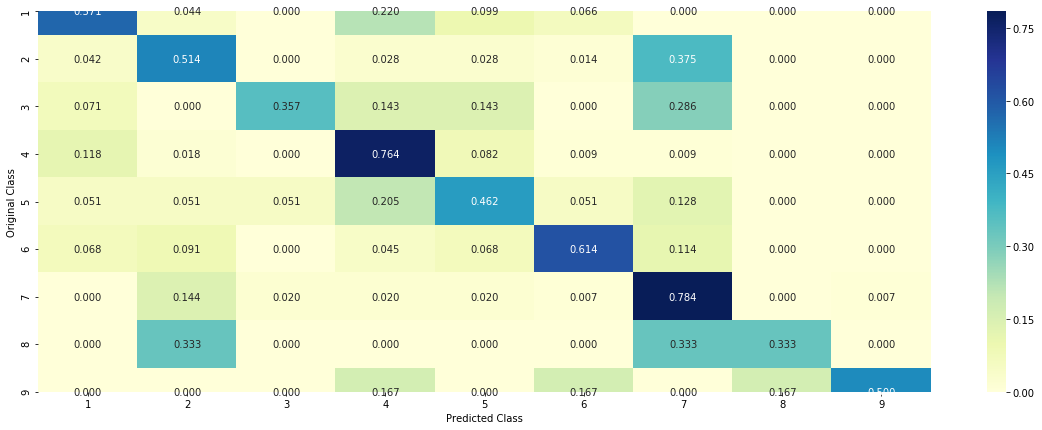

In [109]:
clf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_tfidf, train_y,cv_x_tfidf,cv_y, clf)

# <font color = 'blue'>5.7 Stack the model</font>

### <font color='green'>Important points:</font>
* we lost Model interpratability by using this Stck model
* and also No Feature Importance
* in this Stck models every base model like(svm, logsti reg, NB, Knn) are all share small smount of data for each base classifier
* this is available from mlxtend library

### Hyper parameter Tunning

In [110]:
# classifier1 : logistic regression
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_tfidf_topfts, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

# classifier2 : svm
clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_tfidf_topfts, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

# classifier3: Naive bayes
clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_tfidf_topfts, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

#all calibrated classifiers fit on data
sig_clf1.fit(train_x_tfidf_topfts, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_tfidf))))
sig_clf2.fit(train_x_tfidf_topfts, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_tfidf))))
sig_clf3.fit(train_x_tfidf_topfts, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_tfidf))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_tfidf_topfts, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_tfidf_topfts))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_tfidf_topfts))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.18
Support vector machines : Log Loss: 1.69
Naive Bayes : Log Loss: 1.32
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.180
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.061
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.645
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.287
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.185
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.163


### Testing the model with Best Hyper parameter

Log loss (train) on the stacking classifier : 0.8557992413110608
Log loss (CV) on the stacking classifier : 1.1631356512698827
Log loss (test) on the stacking classifier : 1.071845410052219
Number of missclassified point : 0.35789473684210527
-------------------- Confusion matrix --------------------


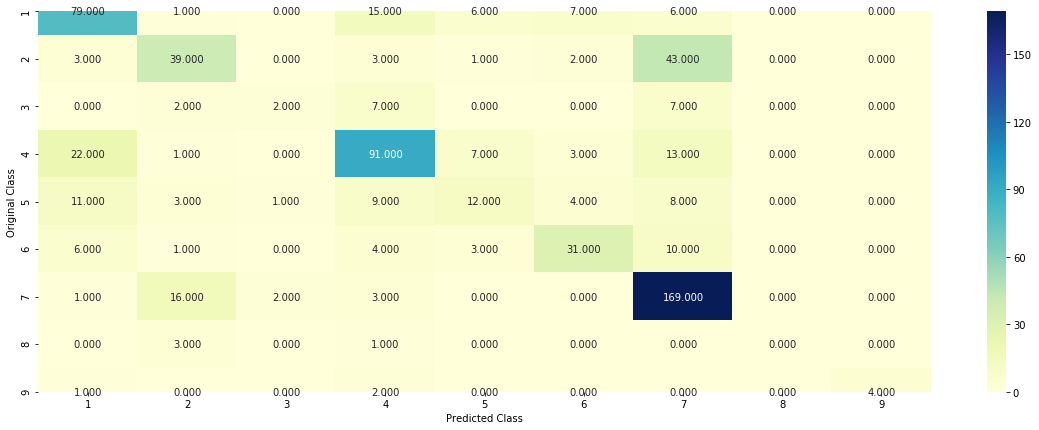

-------------------- Precision matrix (Columm Sum=1) --------------------


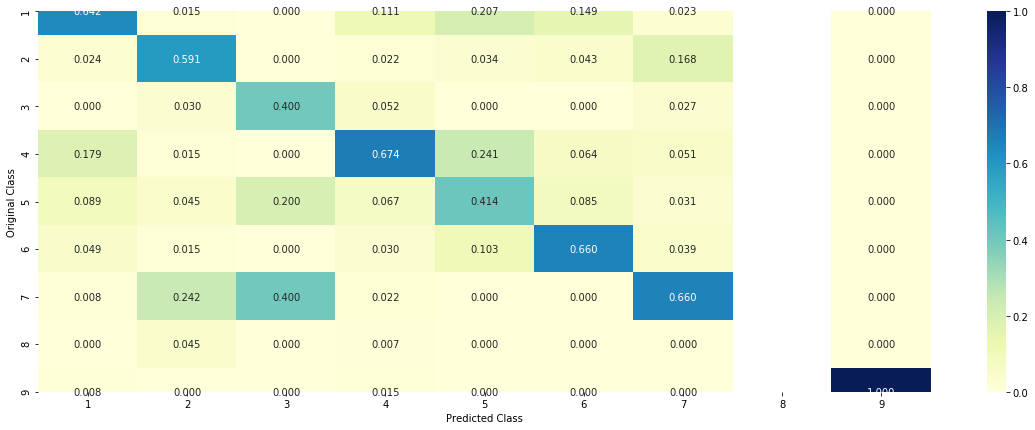

-------------------- Recall matrix (Row sum=1) --------------------


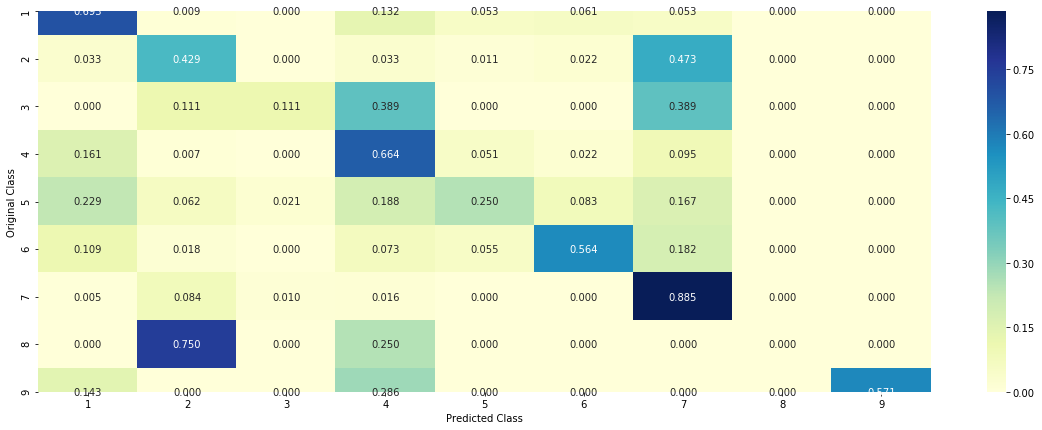

In [113]:
lr = LogisticRegression(C=10)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_tfidf, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_tfidf))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_tfidf))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_tfidf))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_tfidf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_tfidf))

## 5.7.3 Maximum Voting classifier

### Important points:
* Maximum Voting Classifier chooe the majority voting for probablity score of base models 
* using Probblity value = 'soft'
* we cann'y interpratable for this Maximum Voting Clssifier


Log loss (train) on the VotingClassifier : 1.1467870331077505
Log loss (CV) on the VotingClassifier : 1.3091413330554227
Log loss (test) on the VotingClassifier : 1.2417360394291372
Number of missclassified point : 0.4075187969924812
-------------------- Confusion matrix --------------------


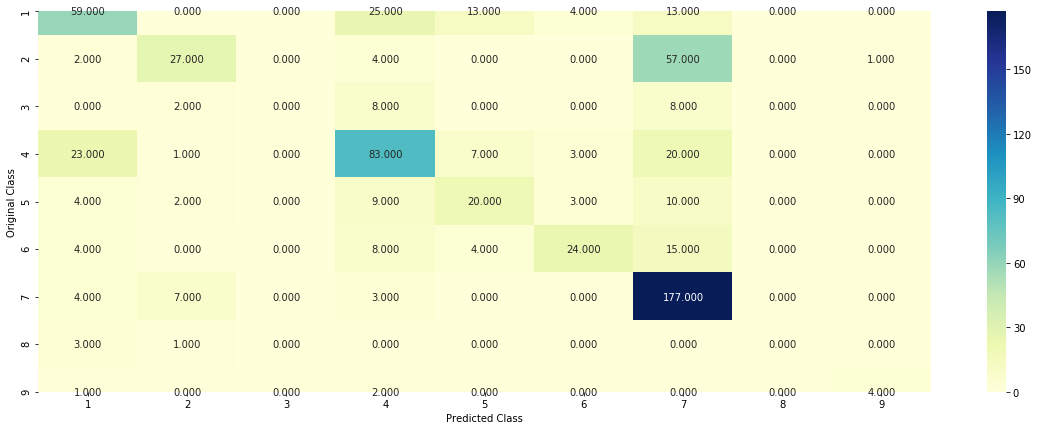

-------------------- Precision matrix (Columm Sum=1) --------------------


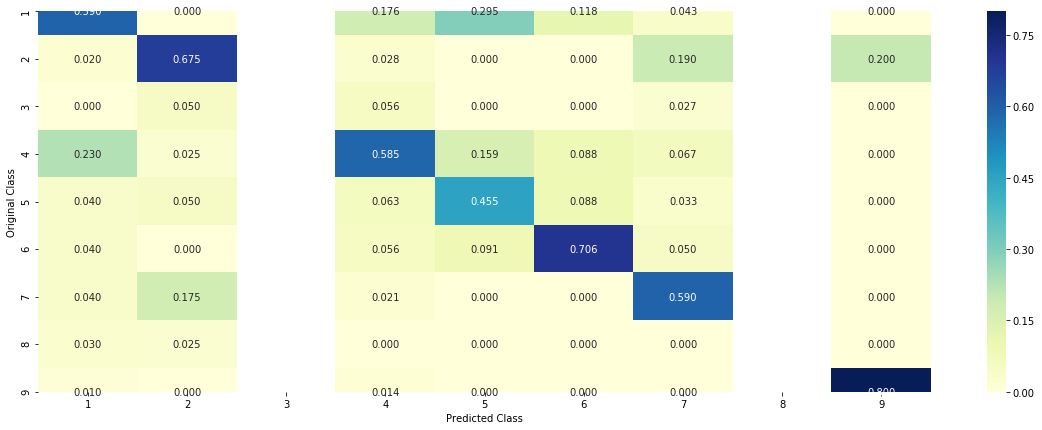

-------------------- Recall matrix (Row sum=1) --------------------


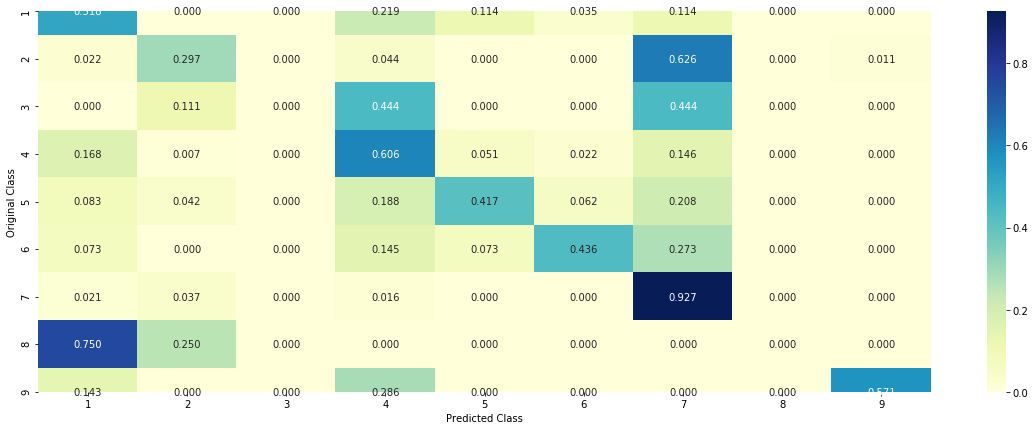

In [114]:
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_tfidf_topfts, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_tfidf_topfts)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_tfidf_topfts)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_tfidf_topfts)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_tfidf_topfts)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_tfidf_topfts))

## 8.       3rd Assignment

## <font color='purple'>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</font>

###  <font color='blue'>8.1 one-hot encoding(or CountVectorize) of 'Gene' feature</font>

In [115]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# one-hot encoding of Gene feature.
##ngram_range=(1,2) selecting unigrams and bigrams
gene_vectorizer = CountVectorizer(ngram_range=(1, 2))
train_gene_feature_onehotCoding1 = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding1 = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding1 = gene_vectorizer.transform(cv_df['Gene'])

print("**after One Hot Encoding **")
print("train data_gene_feature_onh:\t",train_gene_feature_onehotCoding1.shape)
print("cv data_gene_feature_onh:\t",test_gene_feature_onehotCoding1.shape)
print("test data_gene_feature_onh:\t",cv_gene_feature_onehotCoding1.shape)


**after One Hot Encoding **
train data_gene_feature_onh:	 (2124, 233)
cv data_gene_feature_onh:	 (665, 233)
test data_gene_feature_onh:	 (532, 233)


### <font color='blue'>8.2 one-hot encoding(or CountVectorize) of 'variation' feature</font>

In [131]:
# one-hot encoding of variation feature
##ngram_range=(1,2) selecting unigrams and bigrams
# one-hot encoding of variation feature
variation_vectorizer = CountVectorizer(ngram_range=(1, 2))
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

print("**after Responce coding**")
print("train data_variation_feature:  ",train_variation_feature_onehotCoding.shape)
print("cv data_variation_feature:\t",test_variation_feature_onehotCoding.shape)
print("test data_variation_feature:   ",cv_variation_feature_onehotCoding.shape)


**after Responce coding**
train data_variation_feature:   (2124, 2058)
cv data_variation_feature:	 (665, 2058)
test data_variation_feature:    (532, 2058)


### <font color='blue'>8.3 CountVectorize of 'Text' feature</font>

In [156]:
#ngram_range=(1,2) selecting unigrams and bigrams
#min_df=10 : if word occure 4 time then select that word
vectorizer3 =CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer3.fit(train_df['TEXT'].values)
# applying  learned parameters (vocabulary) to the train, cv and cross validation
train_text_feature_vectrz = vectorizer3.transform(train_df['TEXT'].values)
cv_text_feature_vectrz = vectorizer3.transform(cv_df['TEXT'].values)
test_text_feature_vectrz = vectorizer3.transform(test_df['TEXT'].values)

print("*"*60)
print("After vectorizations:")
print(train_text_feature_vectrz.shape, y_train.shape)
print(cv_text_feature_vectrz.shape,y_cv.shape)
print(test_text_feature_vectrz.shape,y_test.shape)

************************************************************
After vectorizations:
(2124, 226515) (2124,)
(532, 226515) (532,)
(665, 226515) (665,)


## <font color='purple'>8.4 Stacking the 3 features('gene','variation' and 'Text')</font?

In [157]:
##### Merging Gene and variation features############
train_gene_var_onehotCoding1 = hstack((train_gene_feature_onehotCoding1,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding1 = hstack((test_gene_feature_onehotCoding1,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding1 = hstack((cv_gene_feature_onehotCoding1,cv_variation_feature_onehotCoding))


### merging three features#######
train_x_vectorzr = hstack((train_gene_var_onehotCoding1, train_text_feature_vectrz)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_vectorzr = hstack((test_gene_var_onehotCoding1, test_text_feature_vectrz)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_vectorzr = hstack((cv_gene_var_onehotCoding1, cv_text_feature_vectrz)).tocsr()
cv_y = np.array(list(cv_df['Class']))


print('after merging the Three features')
print('vectorized train data:  ',train_x_vectorzr.shape,train_y.shape )
print('vectorized cv data:     ',cv_x_vectorzr.shape,cv_y.shape)
print('vectorized test data:   ',test_x_vectorzr.shape,test_y.shape)

after merging the Three features
vectorized train data:   (2124, 228806) (2124,)
vectorized cv data:      (532, 228806) (532,)
vectorized test data:    (665, 228806) (665,)


# <font color='green'>8.5 Logistic Regression</font>

### Hyper parameter Tunning

for alpha = 1e-06
Log Loss : 1.8304997567764278
for alpha = 1e-05
Log Loss : 1.8304997567764278
for alpha = 0.0001
Log Loss : 1.8304997567764278
for alpha = 0.001
Log Loss : 1.3524808829343693
for alpha = 0.01
Log Loss : 1.2738870982664963
for alpha = 0.1
Log Loss : 1.2671453261146708
for alpha = 1
Log Loss : 1.1957953231278304
for alpha = 10
Log Loss : 1.1735011698623634
for alpha = 100
Log Loss : 1.31406996103214


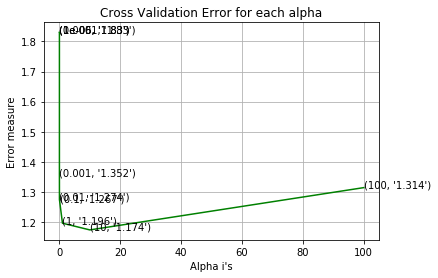

For values of best alpha =  10 The train log loss is: 0.8715620216485834
For values of best alpha =  10 The cross validation log loss is: 1.1735011698623634
For values of best alpha =  10 The test log loss is: 1.17721020838276


In [158]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)   #l2 regulerization
    clf.fit(train_x_vectorzr, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_vectorzr, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_vectorzr)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_vectorzr, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_vectorzr, train_y)

predict_y = sig_clf.predict_proba(train_x_vectorzr)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_vectorzr)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_vectorzr)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

* best alpha value = 10  with low logloss values

### Logisti regression with Best alpha values

Log loss : 1.687889824264559
Number of mis-classified points : 0.6146616541353384
-------------------- Confusion matrix --------------------


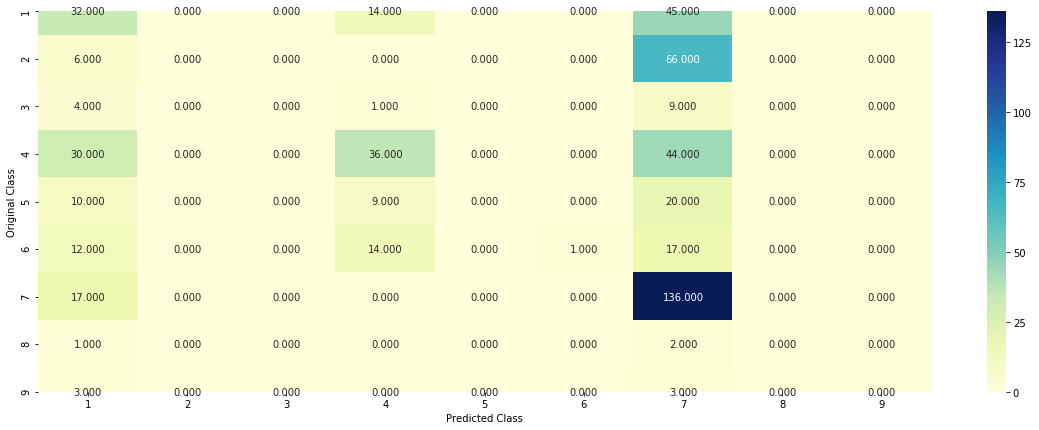

-------------------- Precision matrix (Columm Sum=1) --------------------


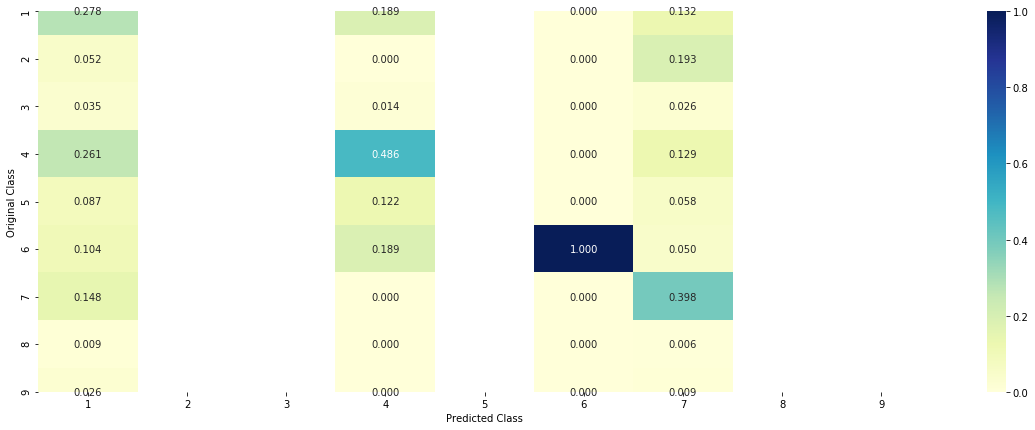

-------------------- Recall matrix (Row sum=1) --------------------


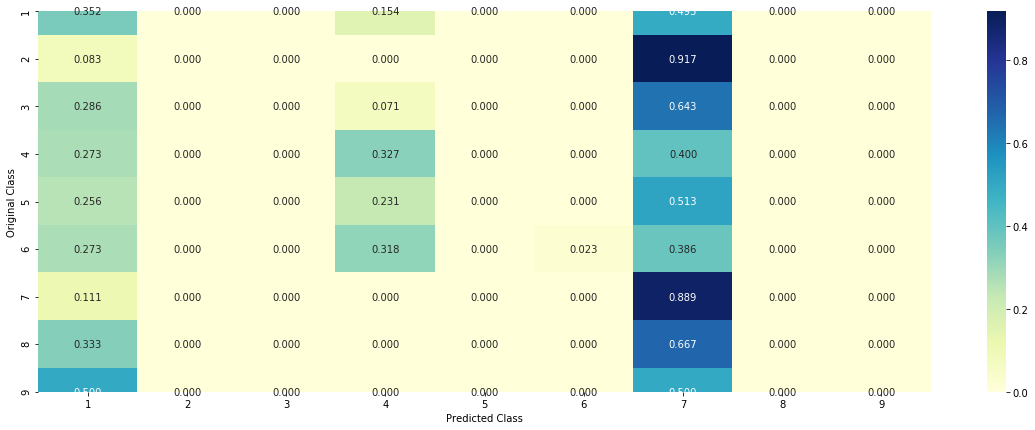

In [159]:
clf = SGDClassifier(class_weight='balanced', alpha=10, penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_tfidf, train_y, cv_x_tfidf, cv_y, clf)

#### Logistic regression may not work well for high Dimensional data so that there is lot of Missclassification error

# 9. 4th Assignment

## <font color='purple'>4. Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</font>


### Selecting 4 gram words using Count vectorizer from Text data

In [27]:
vectorizer_txt = CountVectorizer(ngram_range=(4,4),max_features=1000)  #min_df=6,ngram_range=(4,4),max_features=1000
vct = vectorizer_txt.fit(train_df['TEXT'])

t_vct = vectorizer_txt.transform(train_df['TEXT'])
c_vct = vectorizer_txt.transform(cv_df['TEXT'])
te_vct = vectorizer_txt.transform(test_df['TEXT'])

print("after_vectorization")
print("traintext:",t_vct.shape )
print("cvtext:",c_vct.shape )
print("test text:",te_vct.shape )

after_vectorization
traintext: (2124, 1000)
cvtext: (532, 1000)
test text: (665, 1000)


In [32]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
train_vct=StandardScaler(with_mean=False).fit_transform(t_vct)
cv_vct =  StandardScaler(with_mean=False).fit_transform(c_vct) 
test_vct=StandardScaler(with_mean=False).fit_transform(te_vct)

## Logistic Regression

### hyper parameter tunning

for alpha = 1e-06
Log Loss : 1.7824330191774547
for alpha = 1e-05
Log Loss : 1.5566267840254355
for alpha = 0.0001
Log Loss : 1.5530159415943168
for alpha = 0.001
Log Loss : 1.5453503304872225
for alpha = 0.01
Log Loss : 1.448275046531969
for alpha = 0.1
Log Loss : 1.4253712019167768
for alpha = 1
Log Loss : 1.5535563994166994
for alpha = 10
Log Loss : 1.736349278060104
for alpha = 100
Log Loss : 1.7906100509093203


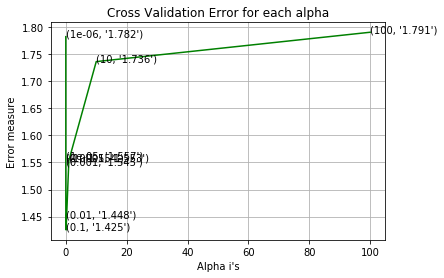

For values of best alpha =  0.1 The train log loss is: 1.0219101981240546
For values of best alpha =  0.1 The cross validation log loss is: 1.3162559154934668
For values of best alpha =  0.1 The test log loss is: 1.2468130326307125


In [34]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)   #l2 regulerization
    clf.fit(train_vct, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_vct, y_train)
    sig_clf_probs = sig_clf.predict_proba(c_vct)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_vct, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_vct, y_train)

predict_y = sig_clf.predict_proba(train_vct)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_vct)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_vct)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### best hyper parameter = 0.1

Log loss : 1.3162559154934668
Number of mis-classified points : 0.462406015037594
-------------------- Confusion matrix --------------------


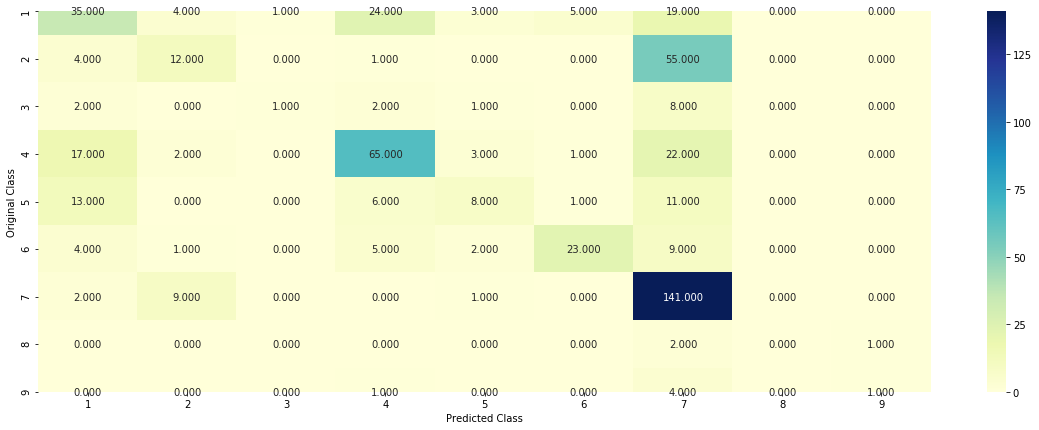

-------------------- Precision matrix (Columm Sum=1) --------------------


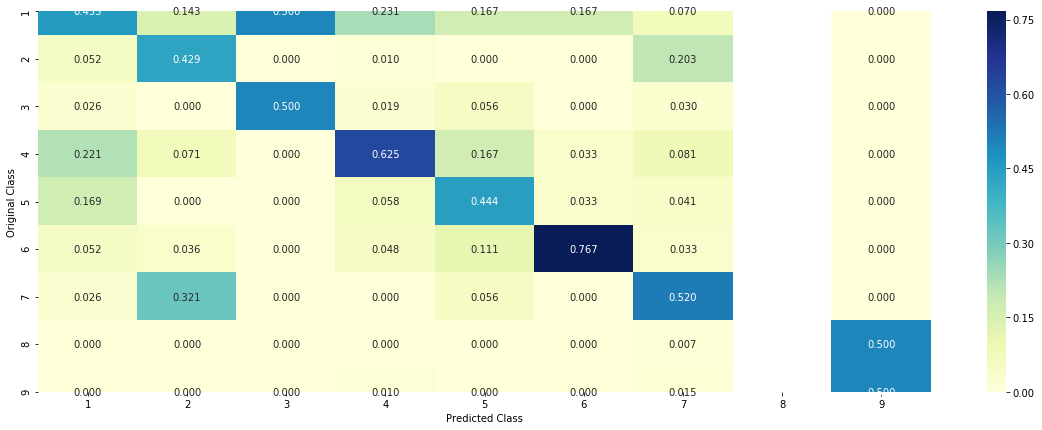

-------------------- Recall matrix (Row sum=1) --------------------


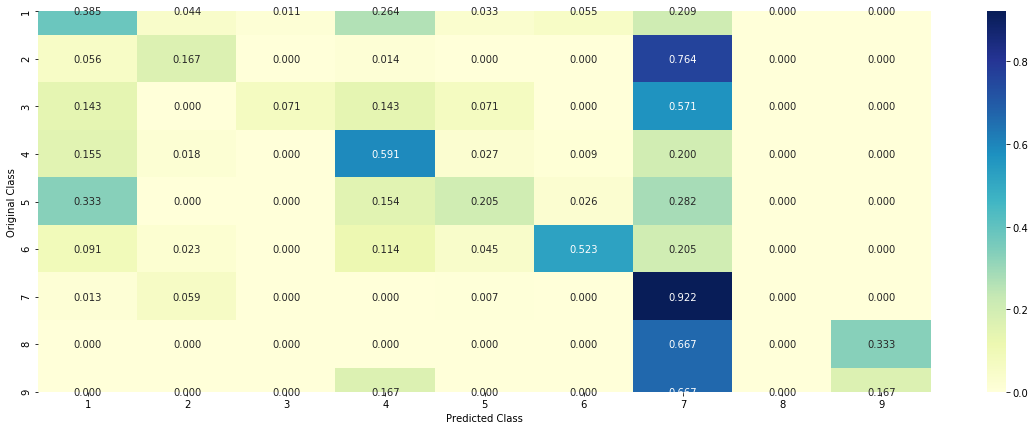

In [35]:
clf = SGDClassifier(class_weight='balanced', alpha=0.1, penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_vct, y_train, cv_vct, y_cv, clf)

# Summary(Conclusion):

* our data set contain 3 features 'gene','variation' and 'Text' data provided by pathologist
* so here Text data is soo important to detect cancer classification
*  here classification problem given as multiclass classification , perfomence metric also multi class logloss value 
* we have performed base models (linear regression, knn, svm, NB , Random forest and stacking classifiers) with performence metric'logloss' value
* we can observe Logistic regression is best classifier which have low test logloss value
* initially we have  performed Random model it gives log loss value = 2.4 wich is dumb model
* so our any base model logloss value had bellow than tha random model log loss value then we can assume our base model is performing good
* some time when we have large dimensional data then logistic regression, linear svm and some time Naive bayes work well
* if we have low dimension data then Random forest, decision trees and knn work well
* eventually we have performed feature enginnering based on text data count vectorization then log loss value is decresed


# Summary in Tabular form

### all results summarized in the tabular form

In [36]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
a = PrettyTable()
a.field_names = ["model","Train_Logloss","cv logloss","Test_logloss",]


a.add_row(["Random model",'-', 2.48,2.48])
a.add_row(["Gene Feature",1.01,1.18,1.19])
a.add_row(["Variation Feature",1.05,1.70,1.71])
a.add_row(["Text Feature",0.68,1.15,1.14])

print(a)

+-------------------+---------------+------------+--------------+
|       model       | Train_Logloss | cv logloss | Test_logloss |
+-------------------+---------------+------------+--------------+
|    Random model   |       -       |    2.48    |     2.48     |
|    Gene Feature   |      1.01     |    1.18    |     1.19     |
| Variation Feature |      1.05     |    1.7     |     1.71     |
|    Text Feature   |      0.68     |    1.15    |     1.14     |
+-------------------+---------------+------------+--------------+


### 1. Tf-idf Text data  (all base models logloss values)

In [37]:
a = PrettyTable()
a.field_names = ["model","Train_Logloss","cv logloss","Test_logloss","%ge missclassification"]


a.add_row(["Naive Bayes", 0.91,0.22,0.22,0.38])
a.add_row(["K-NN",0.89,1.15,1.12,0.41])
a.add_row(["Logistic_regression",0.62,0.92,0.94,0.34])
a.add_row(["Linear SVM",0.59,1.01,1.02,0.33])
a.add_row(["Random Forest",0.50,1.06,1.02,0.35])
a.add_row(["Stack model",0.87,1.18,1.12,0.37])
a.add_row(["Maxim voting clsfr",0.96,1.21,1.16,0.36])

print(a)

+---------------------+---------------+------------+--------------+------------------------+
|        model        | Train_Logloss | cv logloss | Test_logloss | %ge missclassification |
+---------------------+---------------+------------+--------------+------------------------+
|     Naive Bayes     |      0.91     |    0.22    |     0.22     |          0.38          |
|         K-NN        |      0.89     |    1.15    |     1.12     |          0.41          |
| Logistic_regression |      0.62     |    0.92    |     0.94     |          0.34          |
|      Linear SVM     |      0.59     |    1.01    |     1.02     |          0.33          |
|    Random Forest    |      0.5      |    1.06    |     1.02     |          0.35          |
|     Stack model     |      0.87     |    1.18    |     1.12     |          0.37          |
|  Maxim voting clsfr |      0.96     |    1.21    |     1.16     |          0.36          |
+---------------------+---------------+------------+--------------+---

### 2. TFIDF top 1000 features

In [38]:
a = PrettyTable()
a.field_names = ["model","Train_Logloss","cv logloss","Test_logloss","%ge missclassification"]


a.add_row(["Naive Bayes", 1.13,1.32,1.23,0.47])
a.add_row(["K-NN",0.87,1.18,1.14,0.41])
a.add_row(["Logistic_regression",0.71,1.09,1.03,0.38])
a.add_row(["Linear SVM",0.60,1.15,1.05,0.37])
a.add_row(["Random Forest","-",1.07,1.07,0.34])
a.add_row(["Stack model",0.85,1.16,1.07,0.35])
a.add_row(["Maxim voting clsfr",1.14,1.30,1.24,0.40])

print(a)

+---------------------+---------------+------------+--------------+------------------------+
|        model        | Train_Logloss | cv logloss | Test_logloss | %ge missclassification |
+---------------------+---------------+------------+--------------+------------------------+
|     Naive Bayes     |      1.13     |    1.32    |     1.23     |          0.47          |
|         K-NN        |      0.87     |    1.18    |     1.14     |          0.41          |
| Logistic_regression |      0.71     |    1.09    |     1.03     |          0.38          |
|      Linear SVM     |      0.6      |    1.15    |     1.05     |          0.37          |
|    Random Forest    |       -       |    1.07    |     1.07     |          0.34          |
|     Stack model     |      0.85     |    1.16    |     1.07     |          0.35          |
|  Maxim voting clsfr |      1.14     |    1.3     |     1.24     |          0.4           |
+---------------------+---------------+------------+--------------+---

### 3. Count vectorized features (unigrams and bigrams)

In [39]:
a = PrettyTable()
a.field_names = ["model","Train_Logloss","cv logloss","Test_logloss","%ge missclassification"]


a.add_row(["Logistic Regression", 0.87,1.17,1.17,0.61])

print(a)

+---------------------+---------------+------------+--------------+------------------------+
|        model        | Train_Logloss | cv logloss | Test_logloss | %ge missclassification |
+---------------------+---------------+------------+--------------+------------------------+
| Logistic Regression |      0.87     |    1.17    |     1.17     |          0.61          |
+---------------------+---------------+------------+--------------+------------------------+


### 4. Feature eng extracted features using count vectorized (4 grams)

In [42]:
a = PrettyTable()
a.field_names = ["model","Train_Logloss","cv logloss","Test_logloss","%ge missclassification"]


a.add_row(["Logistic Regression", 1.02,1.31,1.24,0.46])

print(a)

+---------------------+---------------+------------+--------------+------------------------+
|        model        | Train_Logloss | cv logloss | Test_logloss | %ge missclassification |
+---------------------+---------------+------------+--------------+------------------------+
| Logistic Regression |      1.02     |    1.31    |     1.24     |          0.46          |
+---------------------+---------------+------------+--------------+------------------------+
